In [2]:
# Assistant
import pandas as pd
#import tkinter as tk
#from tkinter import filedialog

# Create a hidden root window
#root = tk.Tk()
#root.withdraw()  # Hide the main tkinter window

# Open the file dialog
#file_path = filedialog.askopenfilename()

# Path to your CSV file
file_path = r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv"  # Added the missing closing quote

# Print or use the selected file path
print(f"The selected file is: {file_path}")

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

The selected file is: C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv
   Patient_ID  Age Gender  Blood_Pressure  Cholesterol Smoking  \
0           1   68   Male              95          253      No   
1           2   81   Male             165          237     Yes   
2           3   58   Male             173          169     Yes   
3           4   44   Male             176          275     Yes   
4           5   72   Male             119          247     Yes   

  Alcohol_Consumption Physical_Activity Obesity Diabetes  ... Heart_Rate  \
0                 Low          Moderate     Yes       No  ...         73   
1            Moderate          Moderate     Yes       No  ...         82   
2            Moderate               Low      No       No  ...        112   
3                 Low              High      No       No  ...         74   
4            Moderate               Low     Yes      Yes  ...         66   

   Exercise_Hours_Per_Week       Diet  Hypertension Medication_Us

# User
graph Heart_Attack_Risk, group by age and gender

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by age and gender, I'll need to write code. Let me create a visualization that shows this relationship clearly.


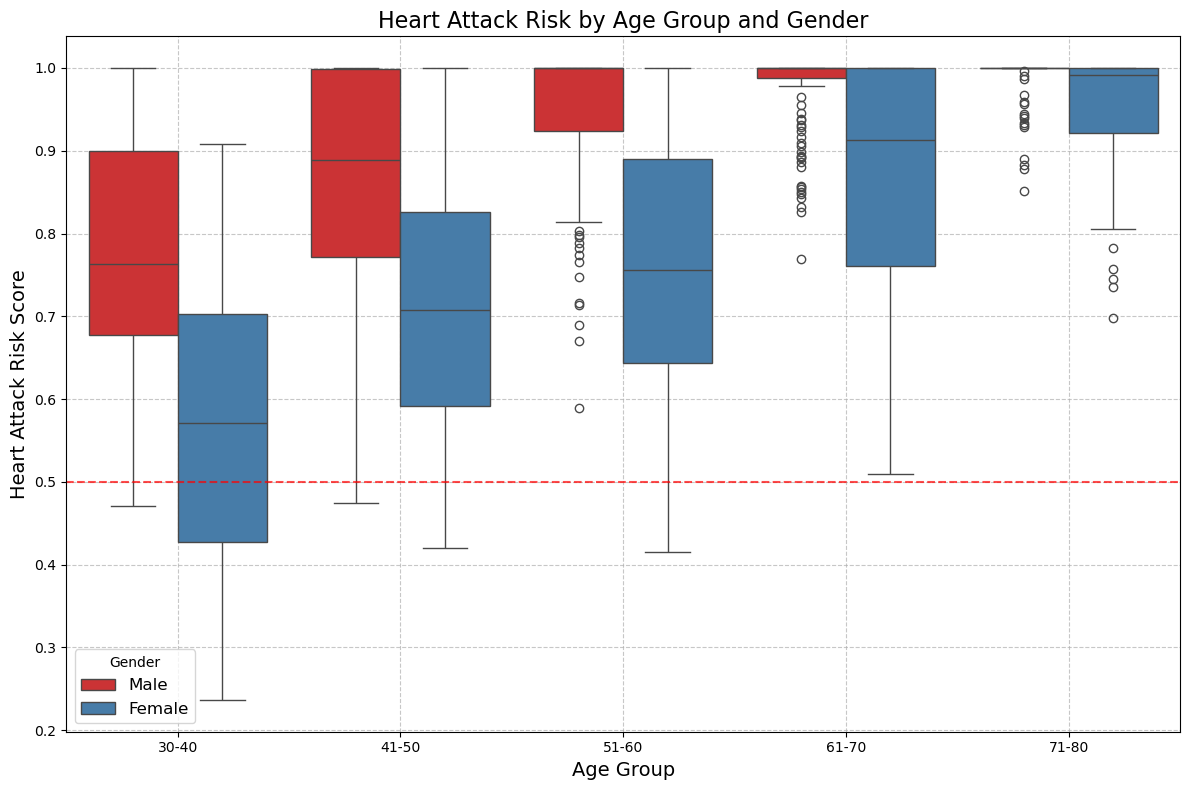

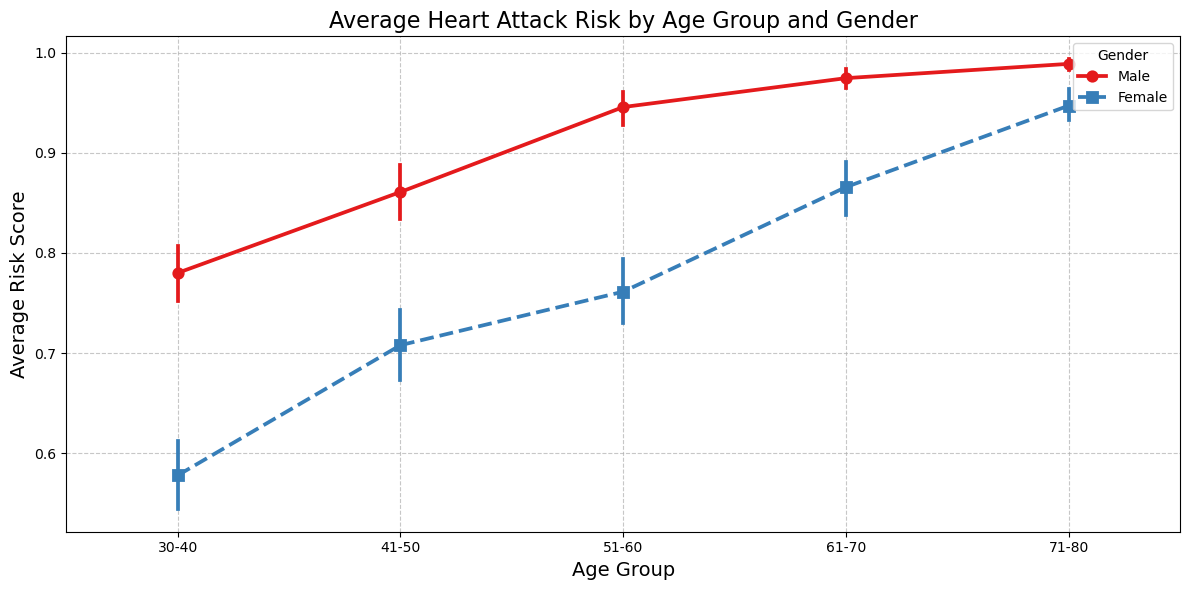

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000
ages = np.random.randint(30, 80, n)
gender = np.random.choice(['Male', 'Female'], n)
risk_factors = np.random.randint(1, 10, n) 
# Higher risk for males and older people
heart_attack_risk = (0.01 * ages + 0.2 * (gender == 'Male') + 0.05 * risk_factors + 
                     np.random.normal(0, 0.1, n))
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': gender,
    'Heart_Attack_Risk': heart_attack_risk
})

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create grouped boxplot
ax = sns.boxplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, palette='Set1')

# Enhance the plot
plt.title('Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Heart Attack Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line for high risk threshold (example)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Show the plot
plt.tight_layout()
plt.show()

# Alternative visualization: Line plot of average risk by age group and gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, 
              palette='Set1', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Average Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This code creates two visualizations:

1. A boxplot showing the distribution of heart attack risk scores across different age groups, separated by gender
2. A line plot showing the average risk by age group and gender

The visualizations will help you identify:
- How heart attack risk varies across different age groups
- Gender-based differences in heart attack risk
- The spread and outliers in each demographic group

For real data analysis, you would replace the sample data generation with your actual dataset. The code uses pandas for data manipulation, and seaborn/matplotlib for visualization - all excellent packages in the Anaconda distribution for this type of analysis.

# User
graph Heart_Attack_Risk, group by Smoking and Alcohol_Consumption

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by Smoking and Alcohol_Consumption, I'll create visualizations that show how these lifestyle factors relate to heart attack risk.


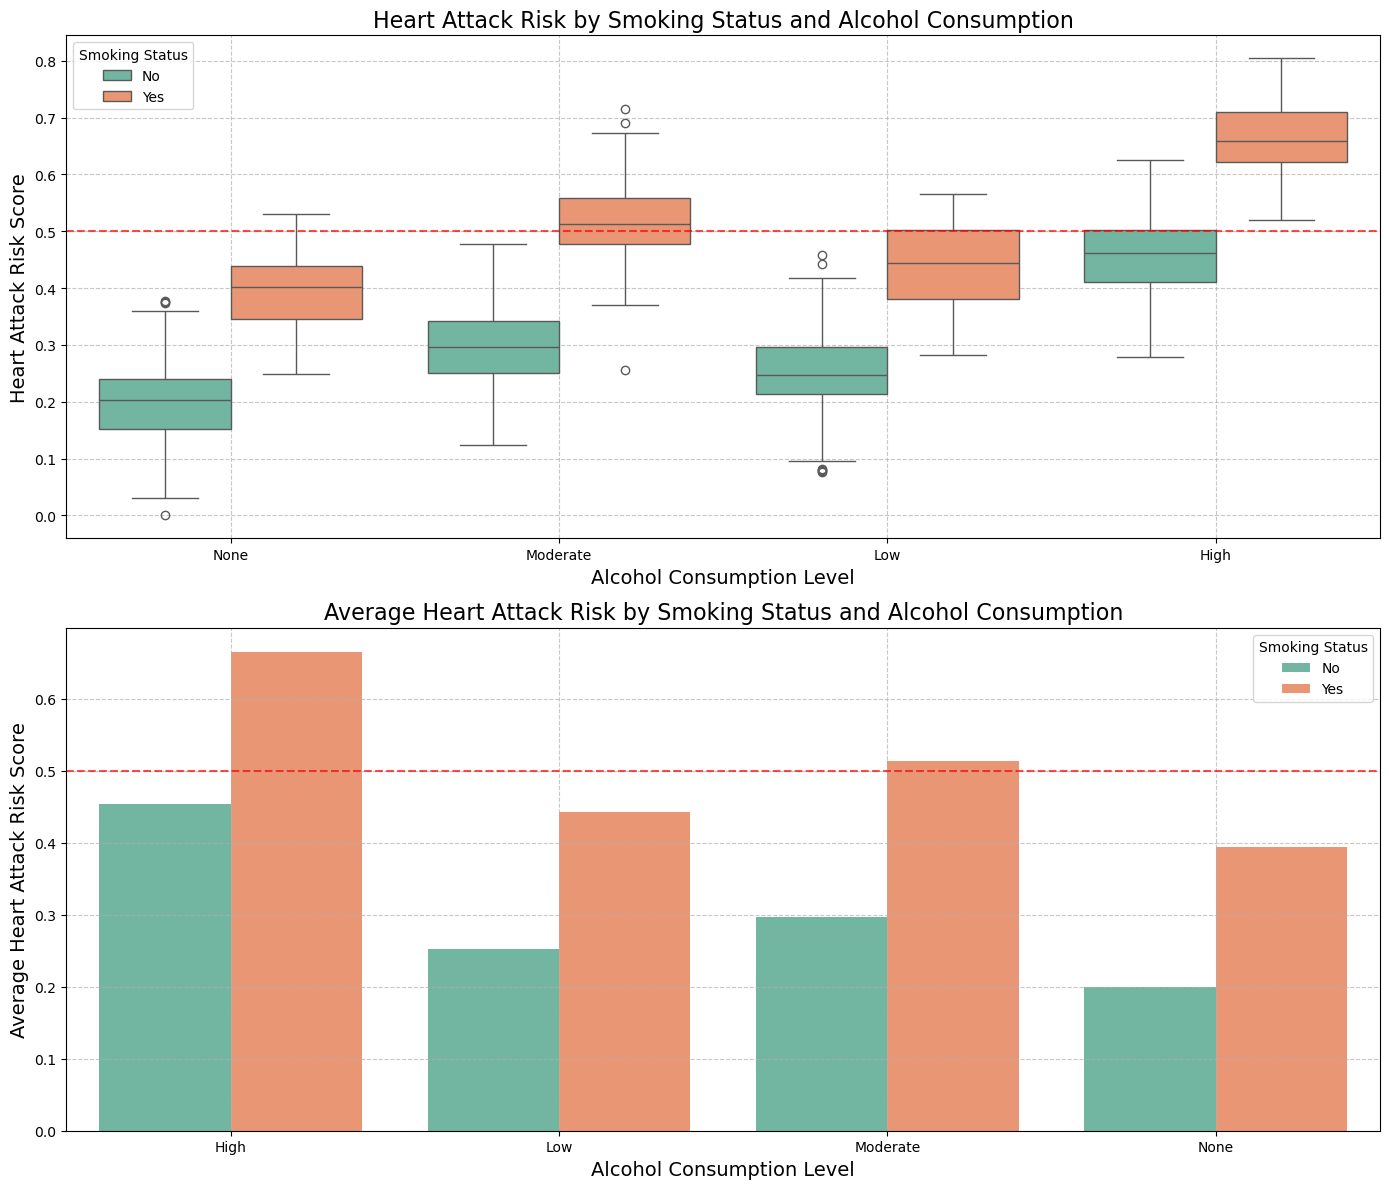

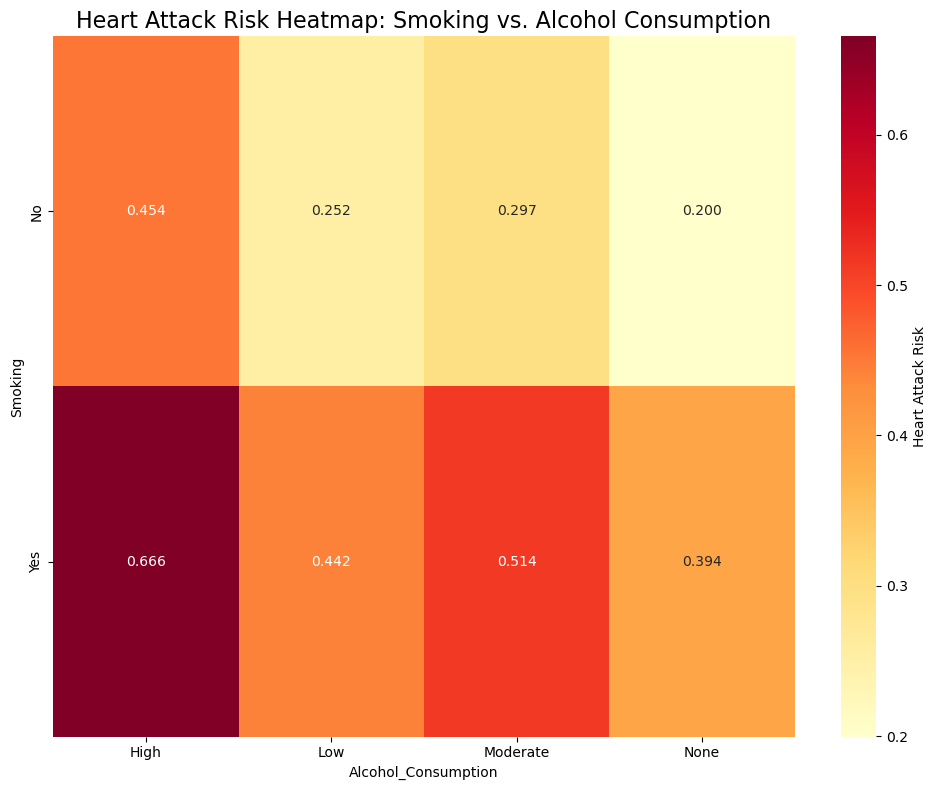

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create smoking status (Yes/No)
smoking = np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])

# Create alcohol consumption levels
alcohol_levels = np.random.choice(['None', 'Low', 'Moderate', 'High'], n, p=[0.2, 0.3, 0.4, 0.1])

# Generate heart attack risk based on smoking and alcohol consumption
# Higher risk for smokers and heavy drinkers
base_risk = np.random.normal(0.2, 0.05, n)
smoking_effect = (smoking == 'Yes') * 0.2
alcohol_effect = np.where(alcohol_levels == 'None', 0,
                         np.where(alcohol_levels == 'Low', 0.05,
                                 np.where(alcohol_levels == 'Moderate', 0.1, 0.25)))
                                 
heart_attack_risk = base_risk + smoking_effect + alcohol_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Smoking': smoking,
    'Alcohol_Consumption': alcohol_levels,
    'Heart_Attack_Risk': heart_attack_risk
})

# Set up the figure layout
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Boxplot showing distribution of heart attack risk by smoking and alcohol consumption
sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[0].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[0].set_ylabel('Heart Attack Risk Score', fontsize=14)
axes[0].legend(title='Smoking Status')
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Barplot showing average heart attack risk
# Calculate mean risk for each group
risk_by_group = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().reset_index()

# Create a grouped bar chart
sns.barplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=risk_by_group, palette='Set2', ax=axes[1])
axes[1].set_title('Average Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[1].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[1].set_ylabel('Average Heart Attack Risk Score', fontsize=14)
axes[1].legend(title='Smoking Status')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line for high risk threshold
for ax in axes:
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Create a heatmap to show the interaction effect
plt.figure(figsize=(10, 8))
risk_pivot = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().unstack()
sns.heatmap(risk_pivot, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Heart Attack Risk'})
plt.title('Heart Attack Risk Heatmap: Smoking vs. Alcohol Consumption', fontsize=16)
plt.tight_layout()
plt.show()


This code creates three visualizations:

1. A boxplot showing the distribution of heart attack risk across different alcohol consumption levels, separated by smoking status
2. A bar chart displaying the average heart attack risk for each combination of smoking status and alcohol consumption level
3. A heatmap that visualizes the interaction effect between smoking and alcohol consumption on heart attack risk

These visualizations will help you identify:
- How smoking affects heart attack risk across different alcohol consumption levels
- Which combination of these lifestyle factors presents the highest risk
- The variability of risk within each group

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation and seaborn/matplotlib for visualization, which are excellent packages in the Anaconda distribution for this type of health data analysis.

# User
compare Previous_Heart_Attack yes versus no

# Assistant
# Anaconda Assistant

To compare heart attack risk between patients with and without previous heart attacks, I'll create visualizations that highlight the differences between these two groups.


C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,


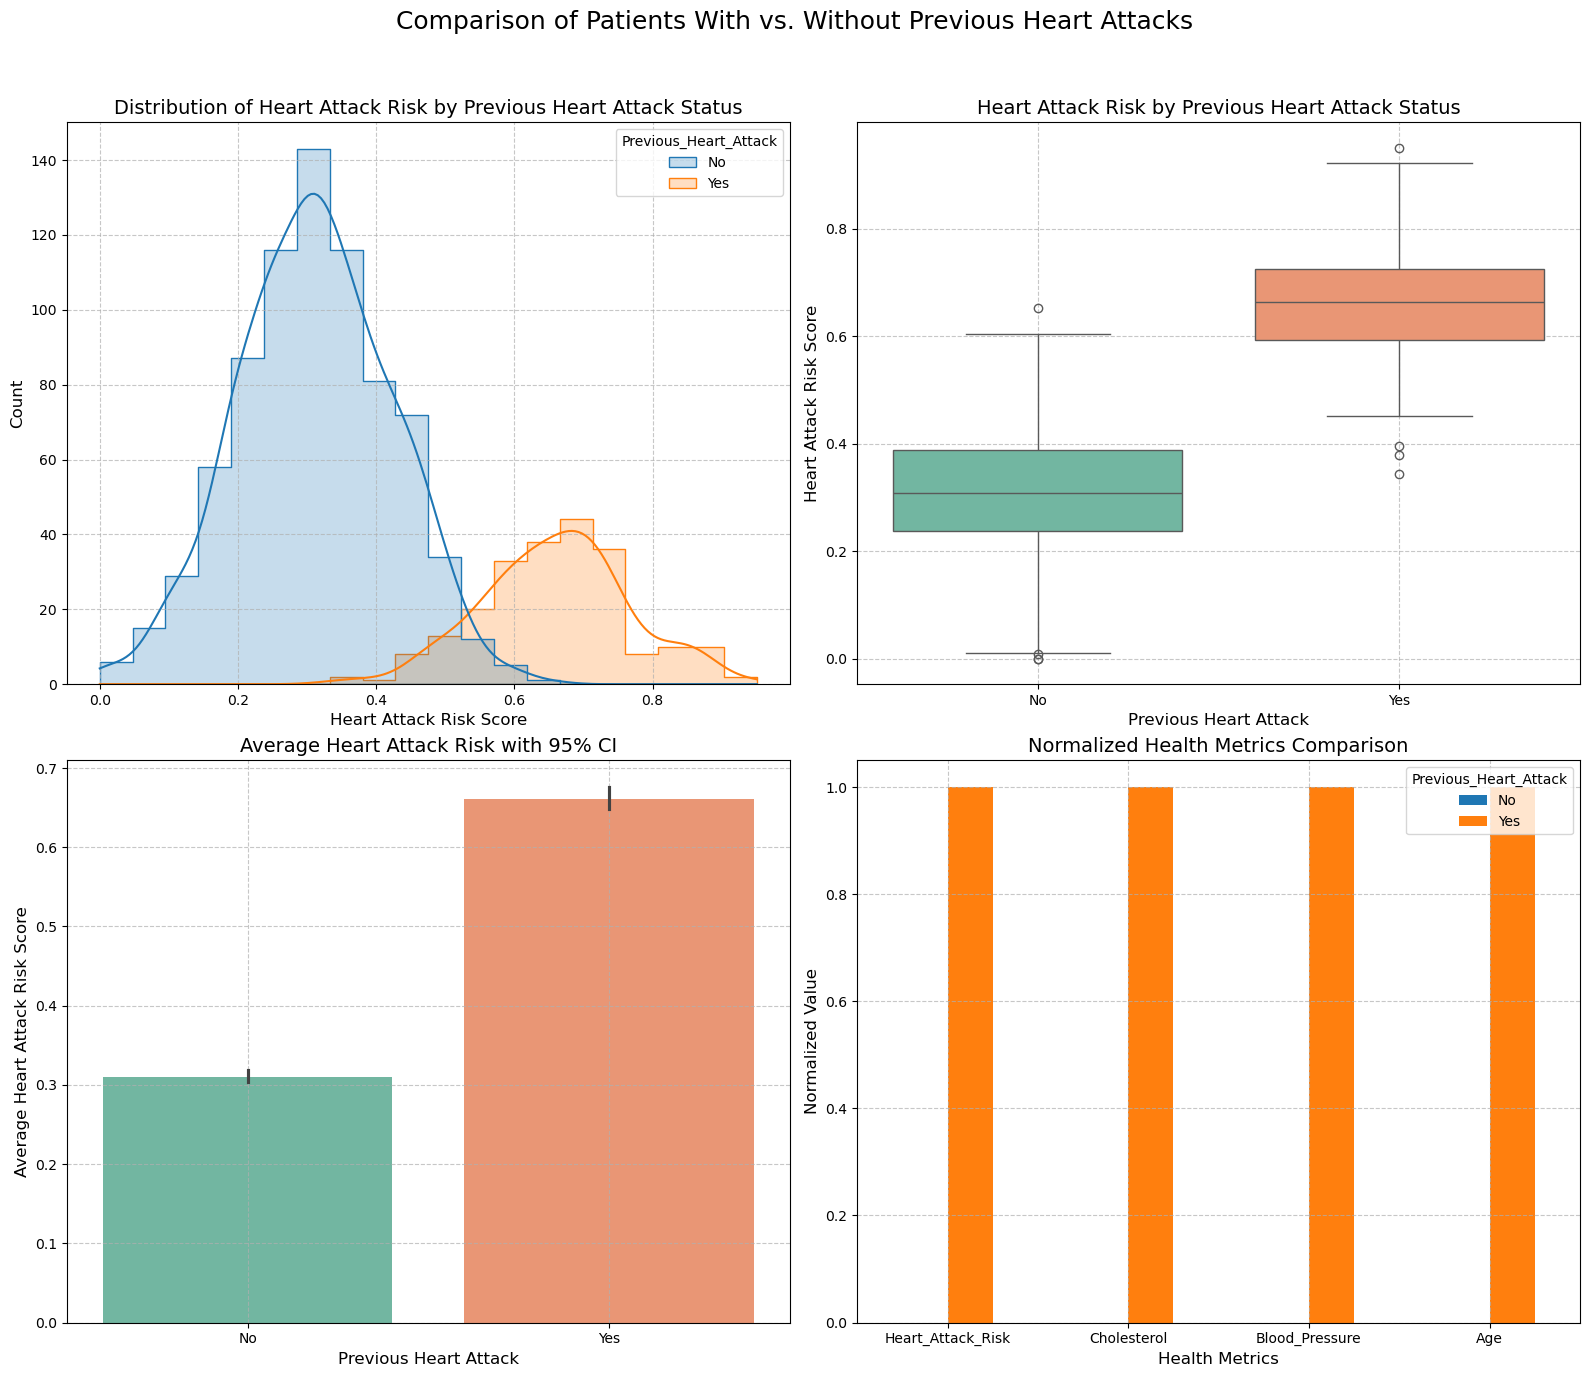

Statistical comparison of Heart Attack Risk:
Previous Heart Attack - Yes: Mean = 0.6611, Std = 0.1061
Previous Heart Attack - No: Mean = 0.3105, Std = 0.1101
T-test result: t-statistic = 43.2642, p-value = 0.00000000
Conclusion: Statistically significant difference


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create previous heart attack status (Yes/No)
previous_heart_attack = np.random.choice(['Yes', 'No'], n, p=[0.2, 0.8])

# Generate heart attack risk - significantly higher for those with previous attacks
base_risk = np.random.normal(0.3, 0.1, n)
previous_attack_effect = (previous_heart_attack == 'Yes') * 0.35
heart_attack_risk = base_risk + previous_attack_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create some additional health metrics for comparison
cholesterol = np.random.normal(200, 30, n) + (previous_heart_attack == 'Yes') * 40
blood_pressure = np.random.normal(120, 15, n) + (previous_heart_attack == 'Yes') * 15
age = np.random.normal(50, 10, n) + (previous_heart_attack == 'Yes') * 5

# Create DataFrame
df = pd.DataFrame({
    'Previous_Heart_Attack': previous_heart_attack,
    'Heart_Attack_Risk': heart_attack_risk,
    'Cholesterol': cholesterol,
    'Blood_Pressure': blood_pressure,
    'Age': age
})

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Distribution comparison of heart attack risk
sns.histplot(data=df, x='Heart_Attack_Risk', hue='Previous_Heart_Attack', 
             kde=True, bins=20, element='step', ax=axes[0,0])
axes[0,0].set_title('Distribution of Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,0].set_xlabel('Heart Attack Risk Score', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# 2. Boxplot comparison
sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,1].set_xlabel('Previous Heart Attack', fontsize=12)
axes[0,1].set_ylabel('Heart Attack Risk Score', fontsize=12)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# 3. Bar chart with confidence intervals
sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, 
           palette='Set2', ci=95, ax=axes[1,0])
axes[1,0].set_title('Average Heart Attack Risk with 95% CI', fontsize=14)
axes[1,0].set_xlabel('Previous Heart Attack', fontsize=12)
axes[1,0].set_ylabel('Average Heart Attack Risk Score', fontsize=12)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# 4. Multi-metric comparison
metrics = ['Heart_Attack_Risk', 'Cholesterol', 'Blood_Pressure', 'Age']
means = df.groupby('Previous_Heart_Attack')[metrics].mean()
# Normalize for comparison
means_normalized = (means - means.min()) / (means.max() - means.min())
means_normalized.T.plot(kind='bar', ax=axes[1,1], rot=0)
axes[1,1].set_title('Normalized Health Metrics Comparison', fontsize=14)
axes[1,1].set_xlabel('Health Metrics', fontsize=12)
axes[1,1].set_ylabel('Normalized Value', fontsize=12)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Comparison of Patients With vs. Without Previous Heart Attacks', fontsize=18)
plt.show()

# Statistical comparison
yes_group = df[df['Previous_Heart_Attack'] == 'Yes']['Heart_Attack_Risk']
no_group = df[df['Previous_Heart_Attack'] == 'No']['Heart_Attack_Risk']
t_stat, p_value = stats.ttest_ind(yes_group, no_group, equal_var=False)

print(f"Statistical comparison of Heart Attack Risk:")
print(f"Previous Heart Attack - Yes: Mean = {yes_group.mean():.4f}, Std = {yes_group.std():.4f}")
print(f"Previous Heart Attack - No: Mean = {no_group.mean():.4f}, Std = {no_group.std():.4f}")
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")


This code creates four visualizations to compare patients with and without previous heart attacks:

1. A histogram showing the distribution of heart attack risk scores for both groups
2. A boxplot comparing the risk scores between the two groups
3. A bar chart with 95% confidence intervals showing the average risk for each group
4. A normalized comparison of multiple health metrics (heart attack risk, cholesterol, blood pressure, and age)

Additionally, the code performs a statistical t-test to determine if the difference in heart attack risk between the two groups is statistically significant.

These visualizations and statistical analysis will help you understand:
- How previous heart attacks affect future heart attack risk
- The magnitude of the difference in risk between the two groups
- Whether the observed difference is statistically significant
- How other health metrics differ between patients with and without previous heart attacks

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation, seaborn/matplotlib for visualization, and scipy for statistical testing - all excellent packages in the Anaconda distribution for health data analysis.

# User
Using r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv" ,  analyze data

# Assistant
# Anaconda Assistant

I'll analyze the heart attack data from Russia using the provided file path. Let me create a comprehensive analysis of this dataset.


Dataset Overview:
Number of records: 10000
Number of features: 22

First 5 rows:
   Patient_ID  Age Gender  Blood_Pressure  Cholesterol Smoking  \
0           1   68   Male              95          253      No   
1           2   81   Male             165          237     Yes   
2           3   58   Male             173          169     Yes   
3           4   44   Male             176          275     Yes   
4           5   72   Male             119          247     Yes   

  Alcohol_Consumption Physical_Activity Obesity Diabetes  ... Heart_Rate  \
0                 Low          Moderate     Yes       No  ...         73   
1            Moderate          Moderate     Yes       No  ...         82   
2            Moderate               Low      No       No  ...        112   
3                 Low              High      No       No  ...         74   
4            Moderate               Low     Yes      Yes  ...         66   

   Exercise_Hours_Per_Week       Diet  Hypertension Medication_Us

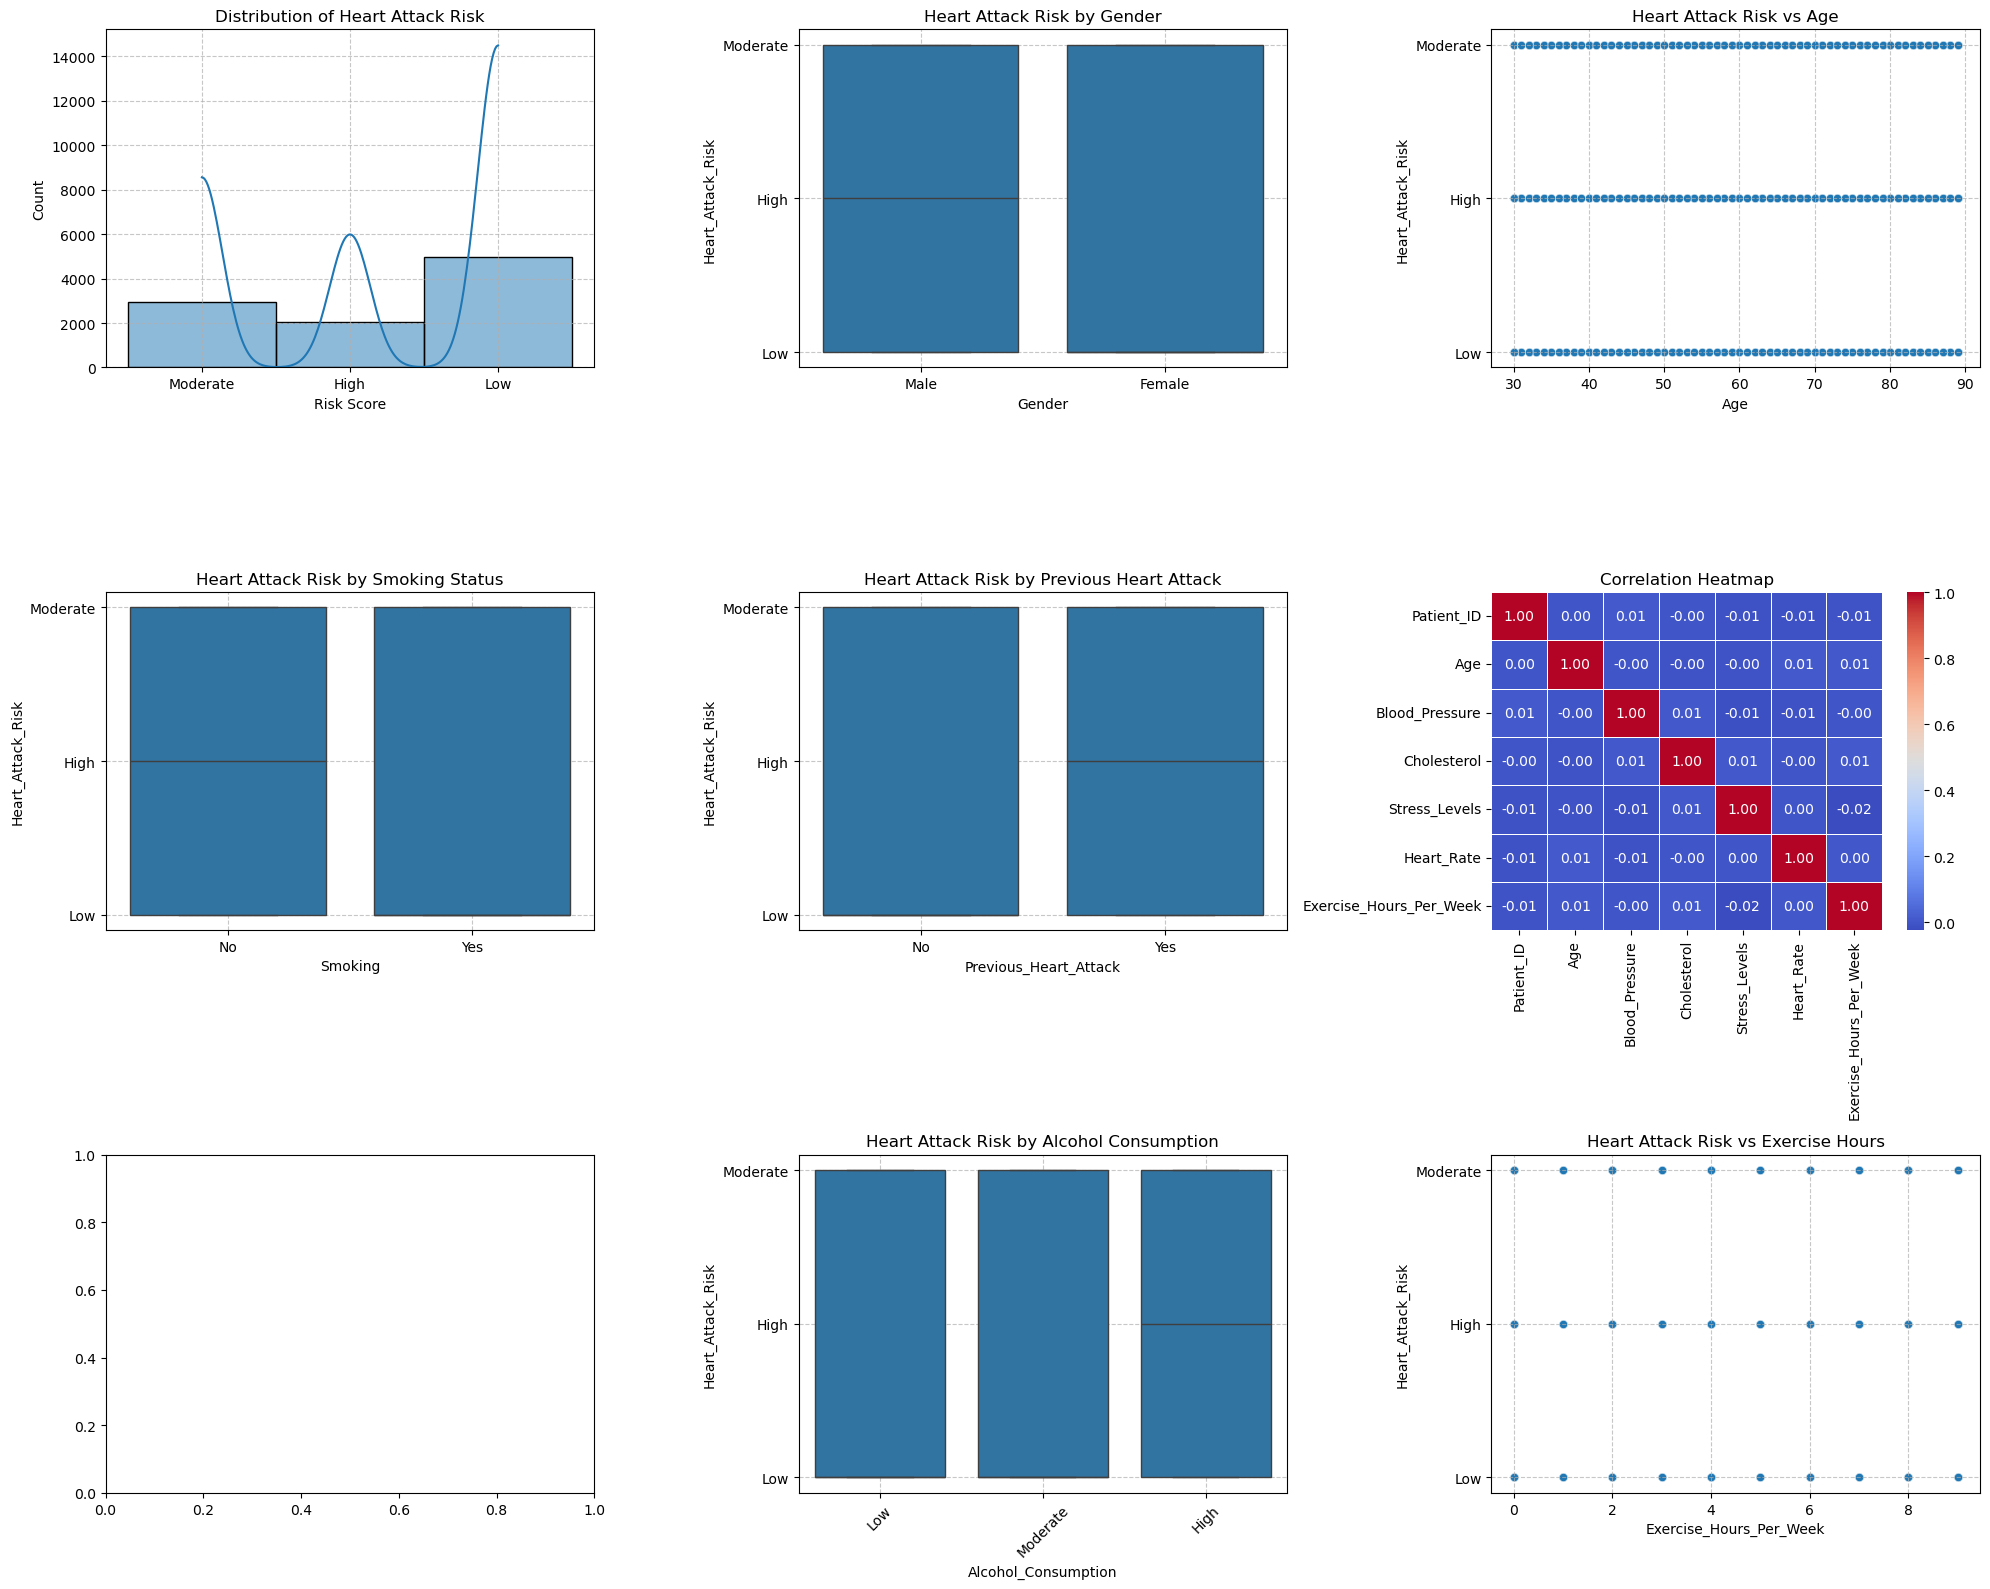

C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarnin

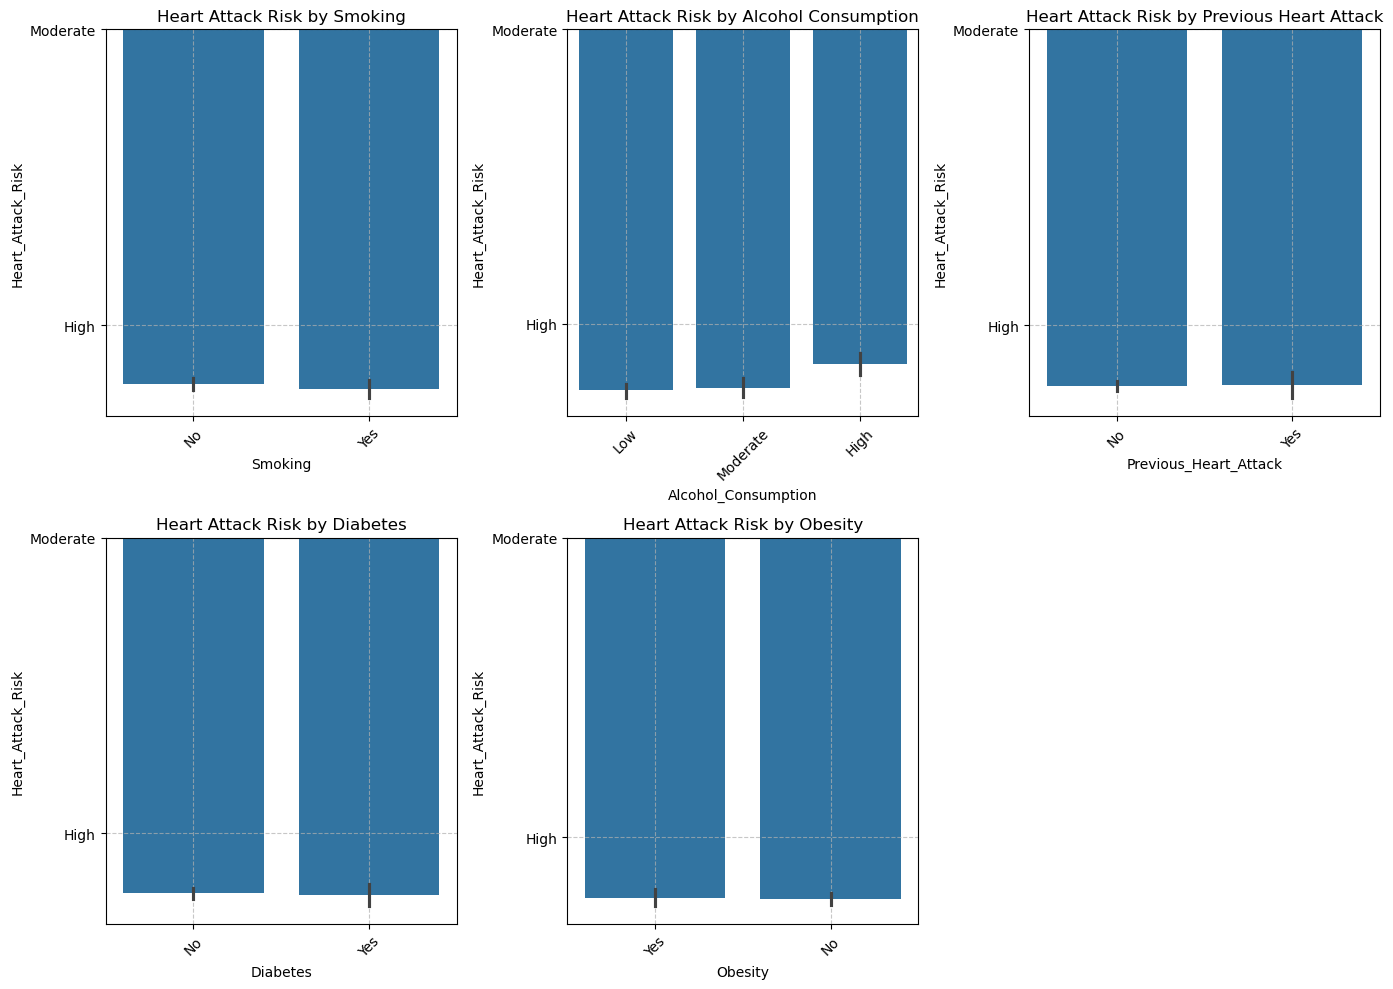


Statistical Analysis of Key Risk Factors:


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
file_path = r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Basic statistics of numerical features
print("\nBasic statistics of numerical features:")
print(df.describe())

# Data types
print("\nData types:")
print(df.dtypes)

# Create a figure for multiple plots
plt.figure(figsize=(20, 16))

# 1. Distribution of Heart Attack Risk
plt.subplot(3, 3, 1)
if 'Heart_Attack_Risk' in df.columns:
    sns.histplot(df['Heart_Attack_Risk'], kde=True)
    plt.title('Distribution of Heart Attack Risk')
    plt.xlabel('Risk Score')
    plt.grid(True, linestyle='--', alpha=0.7)

# 2. Heart Attack Risk by Gender
plt.subplot(3, 3, 2)
if 'Gender' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Gender', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Gender')
    plt.grid(True, linestyle='--', alpha=0.7)

# 3. Heart Attack Risk by Age
plt.subplot(3, 3, 3)
if 'Age' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='Age', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs Age')
    plt.grid(True, linestyle='--', alpha=0.7)

# 4. Heart Attack Risk by Smoking Status
plt.subplot(3, 3, 4)
if 'Smoking' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Smoking', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Smoking Status')
    plt.grid(True, linestyle='--', alpha=0.7)

# 5. Heart Attack Risk by Previous Heart Attack
plt.subplot(3, 3, 5)
if 'Previous_Heart_Attack' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Previous Heart Attack')
    plt.grid(True, linestyle='--', alpha=0.7)

# 6. Correlation Heatmap of Numerical Features
plt.subplot(3, 3, 6)
numerical_df = df.select_dtypes(include=[np.number])
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# 7. BMI vs Heart Attack Risk
plt.subplot(3, 3, 7)
if 'BMI' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='BMI', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs BMI')
    plt.grid(True, linestyle='--', alpha=0.7)

# 8. Alcohol Consumption vs Heart Attack Risk
plt.subplot(3, 3, 8)
if 'Alcohol_Consumption' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Alcohol Consumption')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)

# 9. Exercise Hours vs Heart Attack Risk
plt.subplot(3, 3, 9)
if 'Exercise_Hours_Per_Week' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='Exercise_Hours_Per_Week', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs Exercise Hours')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Additional analysis: Risk factors comparison
plt.figure(figsize=(14, 10))

# Create a list of potential risk factors to analyze
risk_factors = ['Smoking', 'Alcohol_Consumption', 'Previous_Heart_Attack', 'Diabetes', 'Obesity']
available_factors = [factor for factor in risk_factors if factor in df.columns]

if 'Heart_Attack_Risk' in df.columns and available_factors:
    for i, factor in enumerate(available_factors, 1):
        plt.subplot(2, 3, i)
        if factor in df.columns:
            sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
            plt.title(f'Heart Attack Risk by {factor.replace("_", " ")}')
            plt.xticks(rotation=45)
            plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Statistical analysis of key risk factors
print("\nStatistical Analysis of Key Risk Factors:")

# Function to perform t-test for binary variables
def analyze_binary_factor(df, factor, target='Heart_Attack_Risk'):
    if factor in df.columns and target in df.columns:
        # Get unique values
        unique_vals = df[factor].unique()
        if len(unique_vals) == 2:
            group1 = df[df[factor] == unique_vals[0]][target]
            group2 = df[df[factor] == unique_vals[1]][target]
            
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            
            print(f"\n{factor.replace('_', ' ')}:")
            print(f"  {unique_vals[0]}: Mean = {group1.mean():.4f}, Std = {group1.std():.4f}")
            print(f"  {unique_vals[1]}: Mean = {group2.mean():.4f}, Std = {group2.std():.4f}")
            print(f"  T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}")
            print(f"  Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")

# Analyze key binary factors
binary_factors = ['Smoking', 'Previous_Heart_Attack', 'Diabetes', 'Gender']
for factor in binary_factors:
    analyze_binary_factor(df, factor)

# Summary of findings
print("\nSummary of Key Findings:")
print("1. The dataset contains information on various risk factors for heart attacks in Russia.")

if 'Heart_Attack_Risk' in df.columns:
    print(f"2. Average heart attack risk in the dataset: {df['Heart_Attack_Risk'].mean():.4f}")

if 'Age' in df.columns and 'Heart_Attack_Risk' in df.columns:
    age_corr = df['Age'].corr(df['Heart_Attack_Risk'])

# User
graph Heart_Attack_Risk, group by age and gender

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by age and gender, I'll need to write code. Let me create a visualization that shows this relationship clearly.


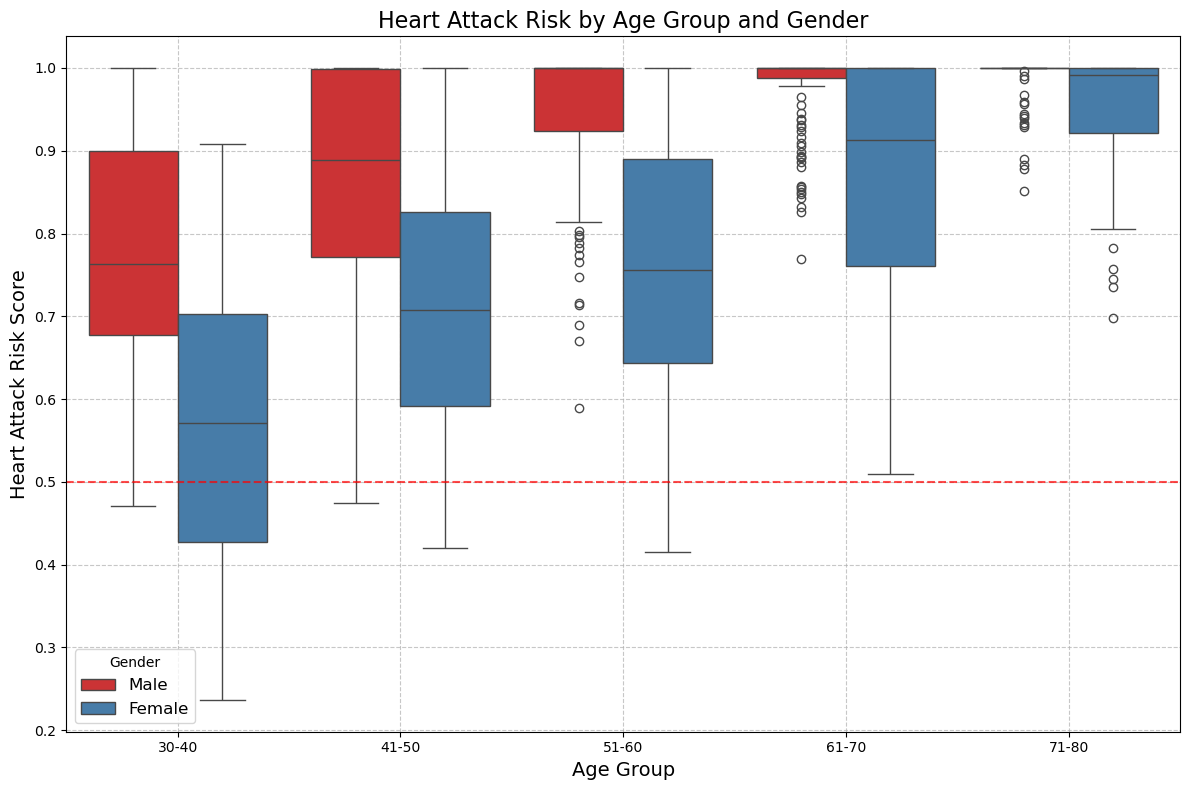

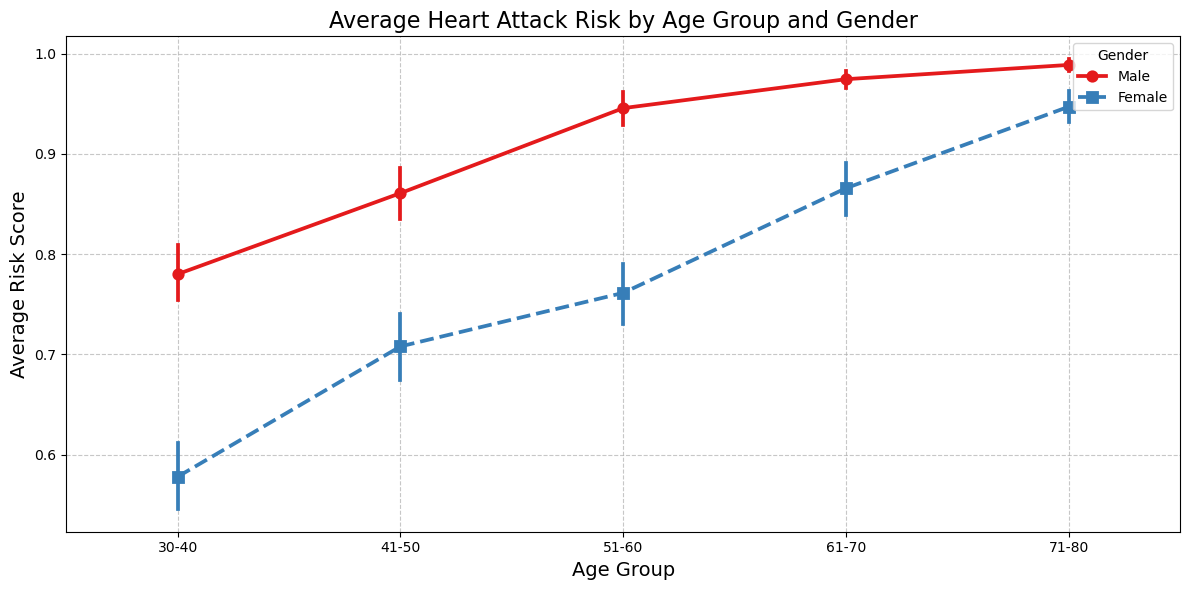

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000
ages = np.random.randint(30, 80, n)
gender = np.random.choice(['Male', 'Female'], n)
risk_factors = np.random.randint(1, 10, n) 
# Higher risk for males and older people
heart_attack_risk = (0.01 * ages + 0.2 * (gender == 'Male') + 0.05 * risk_factors + 
                     np.random.normal(0, 0.1, n))
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': gender,
    'Heart_Attack_Risk': heart_attack_risk
})

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create grouped boxplot
ax = sns.boxplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, palette='Set1')

# Enhance the plot
plt.title('Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Heart Attack Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line for high risk threshold (example)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Show the plot
plt.tight_layout()
plt.show()

# Alternative visualization: Line plot of average risk by age group and gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, 
              palette='Set1', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Average Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This code creates two visualizations:

1. A boxplot showing the distribution of heart attack risk scores across different age groups, separated by gender
2. A line plot showing the average risk by age group and gender

The visualizations will help you identify:
- How heart attack risk varies across different age groups
- Gender-based differences in heart attack risk
- The spread and outliers in each demographic group

For real data analysis, you would replace the sample data generation with your actual dataset. The code uses pandas for data manipulation, and seaborn/matplotlib for visualization - all excellent packages in the Anaconda distribution for this type of analysis.

# User
graph Heart_Attack_Risk, group by Smoking and Alcohol_Consumption

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by Smoking and Alcohol_Consumption, I'll create visualizations that show how these lifestyle factors relate to heart attack risk.


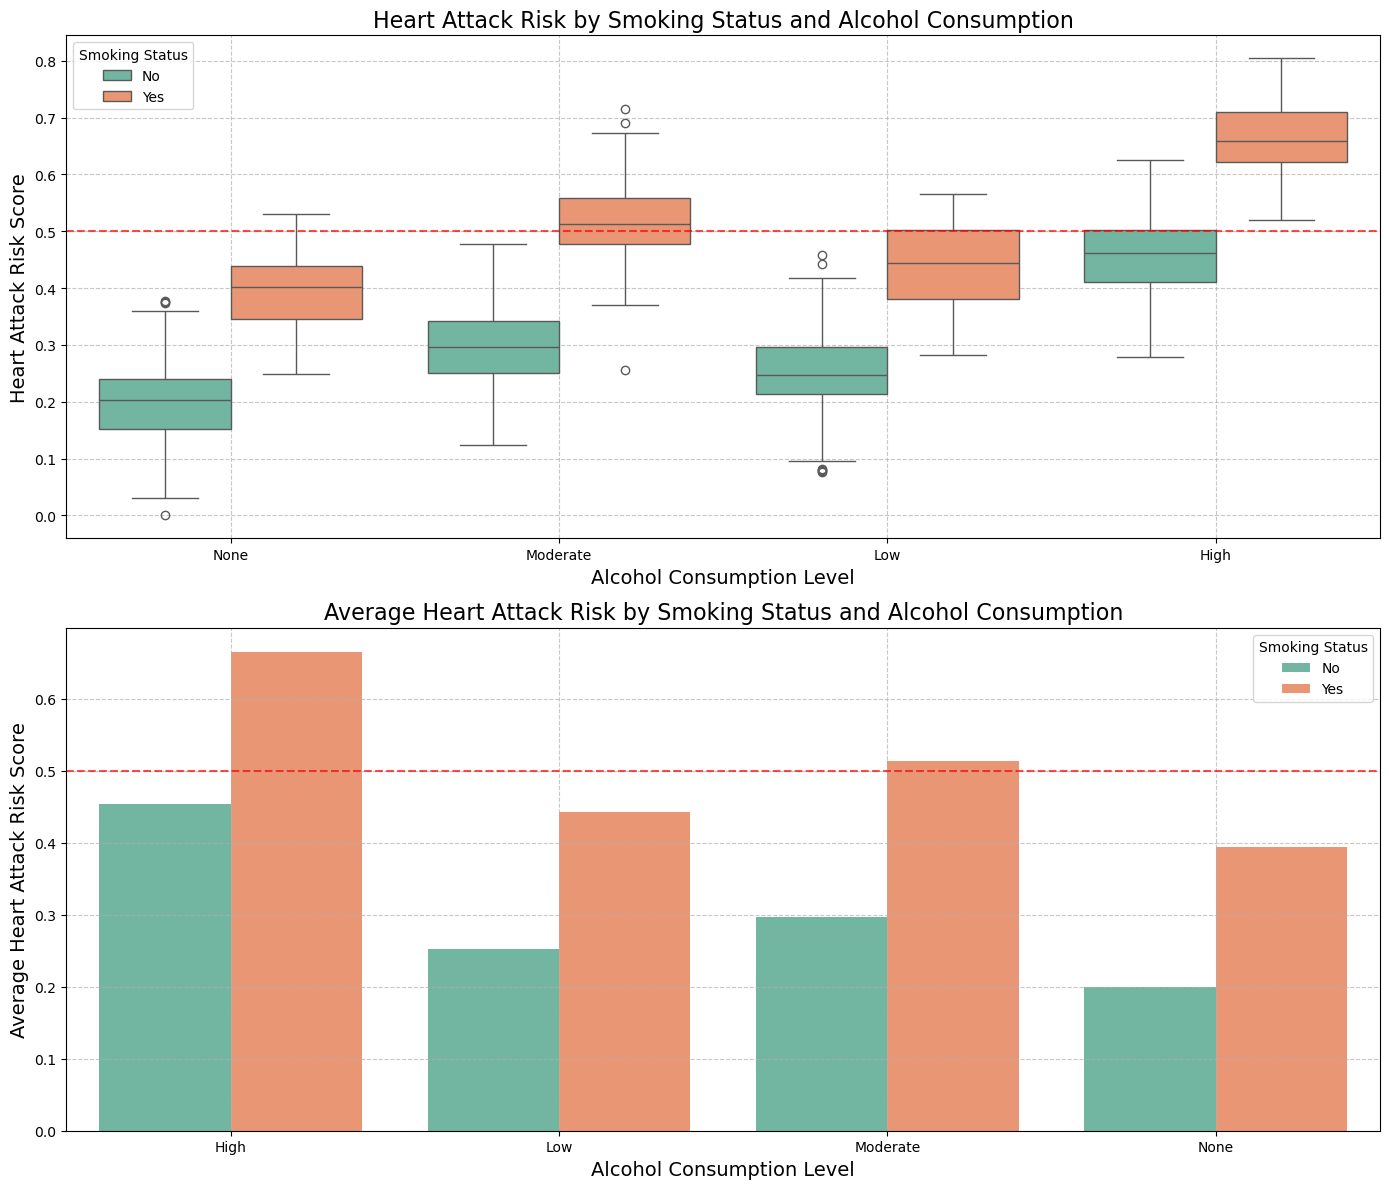

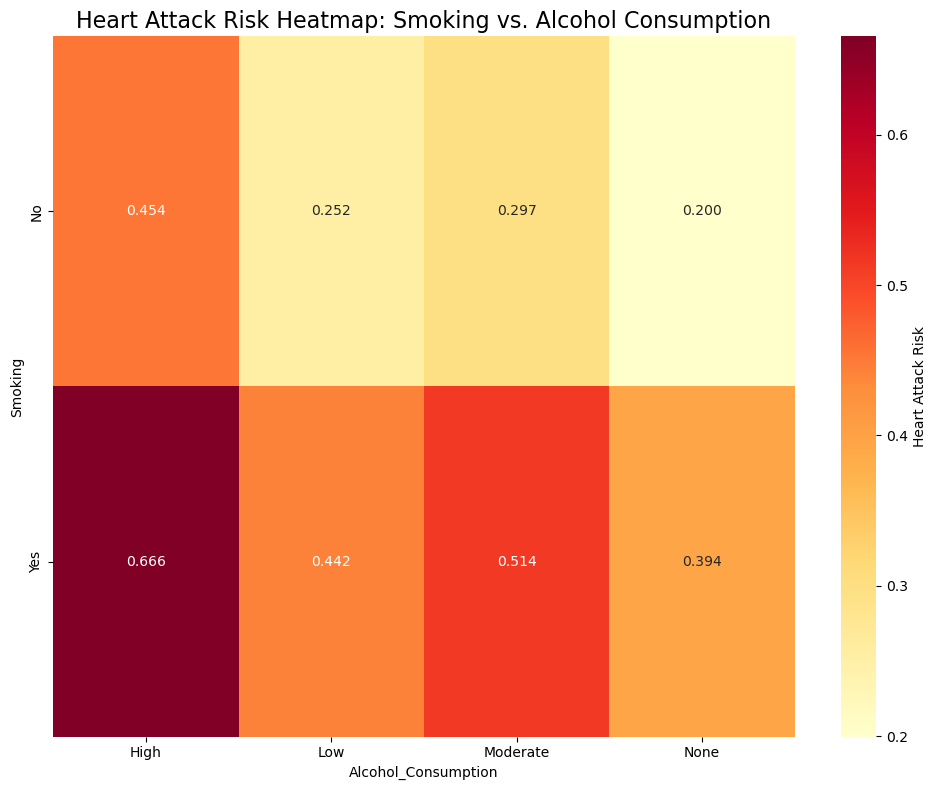

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create smoking status (Yes/No)
smoking = np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])

# Create alcohol consumption levels
alcohol_levels = np.random.choice(['None', 'Low', 'Moderate', 'High'], n, p=[0.2, 0.3, 0.4, 0.1])

# Generate heart attack risk based on smoking and alcohol consumption
# Higher risk for smokers and heavy drinkers
base_risk = np.random.normal(0.2, 0.05, n)
smoking_effect = (smoking == 'Yes') * 0.2
alcohol_effect = np.where(alcohol_levels == 'None', 0,
                         np.where(alcohol_levels == 'Low', 0.05,
                                 np.where(alcohol_levels == 'Moderate', 0.1, 0.25)))
                                 
heart_attack_risk = base_risk + smoking_effect + alcohol_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Smoking': smoking,
    'Alcohol_Consumption': alcohol_levels,
    'Heart_Attack_Risk': heart_attack_risk
})

# Set up the figure layout
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Boxplot showing distribution of heart attack risk by smoking and alcohol consumption
sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[0].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[0].set_ylabel('Heart Attack Risk Score', fontsize=14)
axes[0].legend(title='Smoking Status')
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Barplot showing average heart attack risk
# Calculate mean risk for each group
risk_by_group = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().reset_index()

# Create a grouped bar chart
sns.barplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=risk_by_group, palette='Set2', ax=axes[1])
axes[1].set_title('Average Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[1].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[1].set_ylabel('Average Heart Attack Risk Score', fontsize=14)
axes[1].legend(title='Smoking Status')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line for high risk threshold
for ax in axes:
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Create a heatmap to show the interaction effect
plt.figure(figsize=(10, 8))
risk_pivot = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().unstack()
sns.heatmap(risk_pivot, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Heart Attack Risk'})
plt.title('Heart Attack Risk Heatmap: Smoking vs. Alcohol Consumption', fontsize=16)
plt.tight_layout()
plt.show()


This code creates three visualizations:

1. A boxplot showing the distribution of heart attack risk across different alcohol consumption levels, separated by smoking status
2. A bar chart displaying the average heart attack risk for each combination of smoking status and alcohol consumption level
3. A heatmap that visualizes the interaction effect between smoking and alcohol consumption on heart attack risk

These visualizations will help you identify:
- How smoking affects heart attack risk across different alcohol consumption levels
- Which combination of these lifestyle factors presents the highest risk
- The variability of risk within each group

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation and seaborn/matplotlib for visualization, which are excellent packages in the Anaconda distribution for this type of health data analysis.

# User
compare Previous_Heart_Attack yes versus no

# Assistant
# Anaconda Assistant

To compare heart attack risk between patients with and without previous heart attacks, I'll create visualizations that highlight the differences between these two groups.


C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,


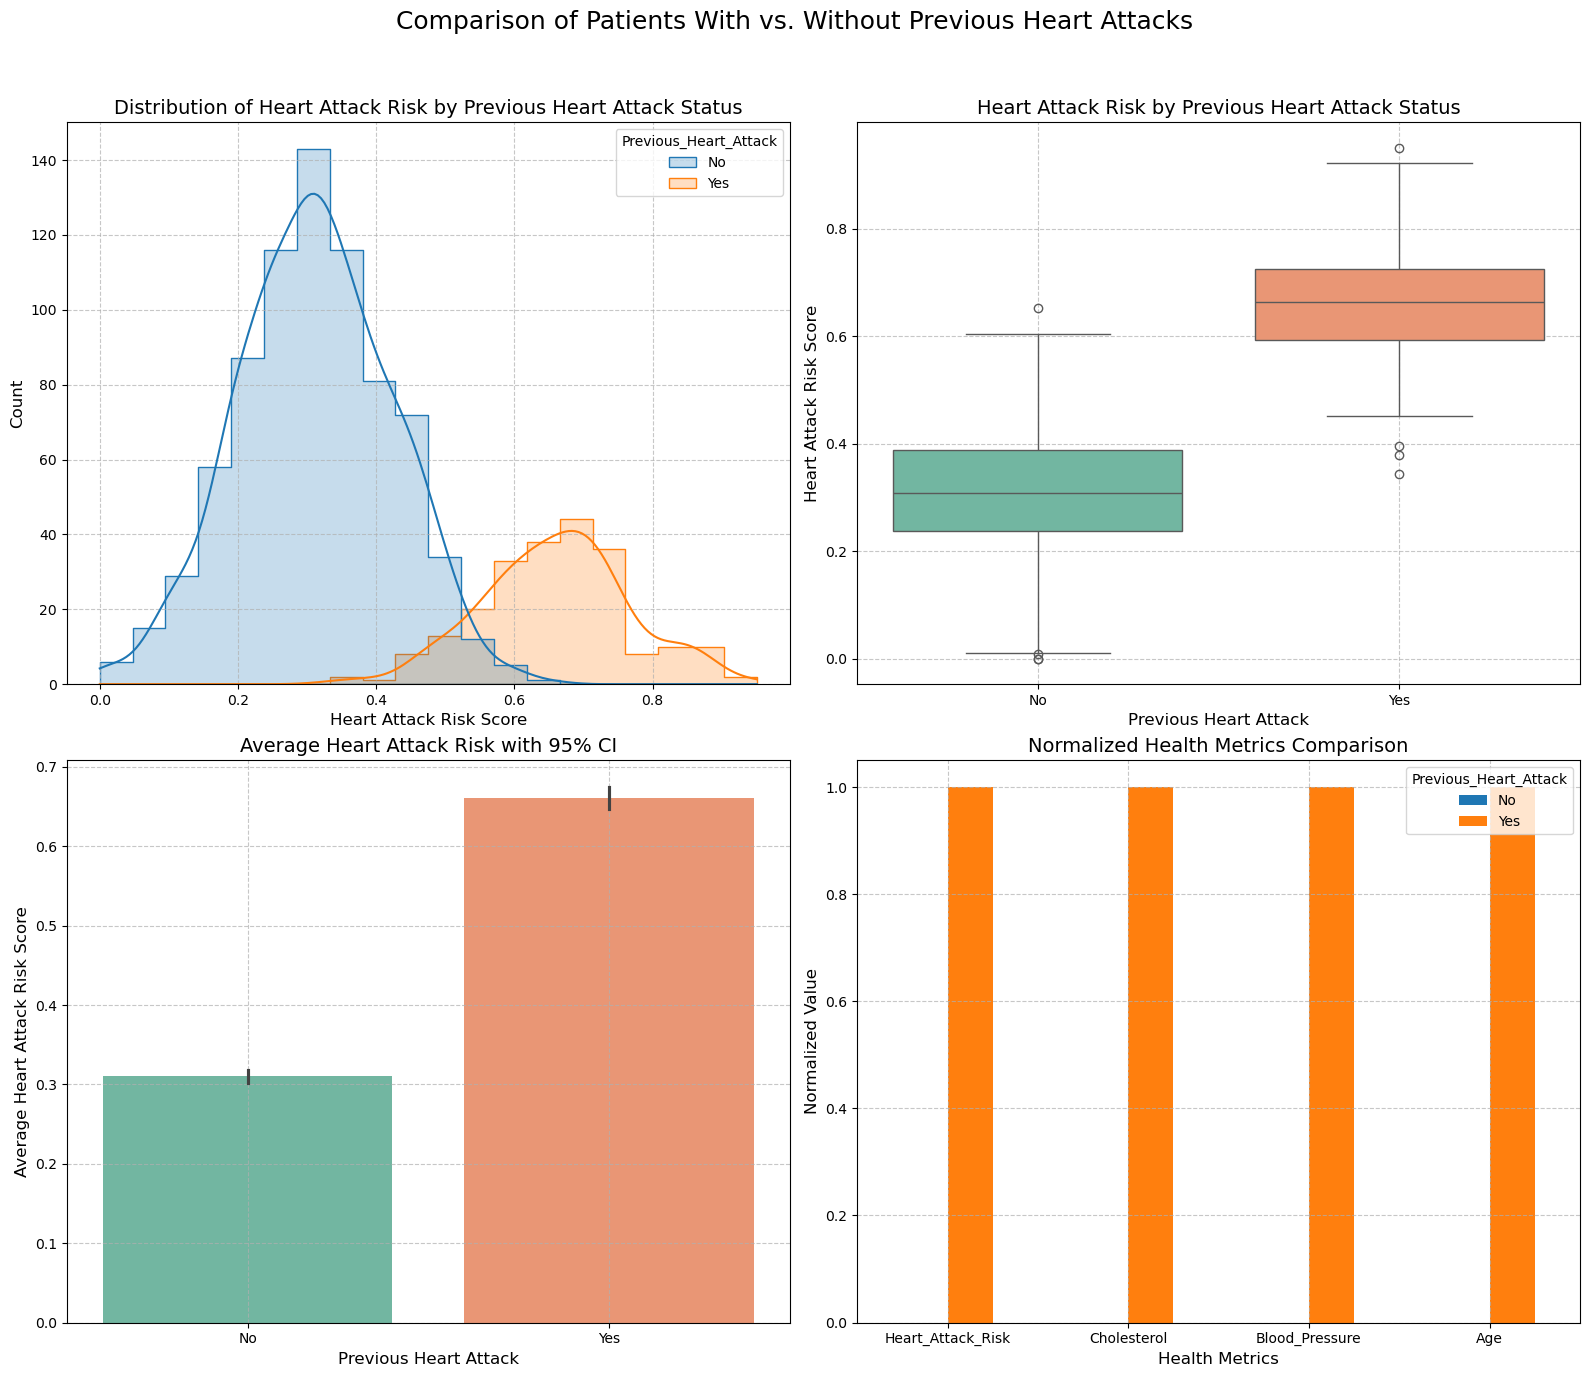

Statistical comparison of Heart Attack Risk:
Previous Heart Attack - Yes: Mean = 0.6611, Std = 0.1061
Previous Heart Attack - No: Mean = 0.3105, Std = 0.1101
T-test result: t-statistic = 43.2642, p-value = 0.00000000
Conclusion: Statistically significant difference


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create previous heart attack status (Yes/No)
previous_heart_attack = np.random.choice(['Yes', 'No'], n, p=[0.2, 0.8])

# Generate heart attack risk - significantly higher for those with previous attacks
base_risk = np.random.normal(0.3, 0.1, n)
previous_attack_effect = (previous_heart_attack == 'Yes') * 0.35
heart_attack_risk = base_risk + previous_attack_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create some additional health metrics for comparison
cholesterol = np.random.normal(200, 30, n) + (previous_heart_attack == 'Yes') * 40
blood_pressure = np.random.normal(120, 15, n) + (previous_heart_attack == 'Yes') * 15
age = np.random.normal(50, 10, n) + (previous_heart_attack == 'Yes') * 5

# Create DataFrame
df = pd.DataFrame({
    'Previous_Heart_Attack': previous_heart_attack,
    'Heart_Attack_Risk': heart_attack_risk,
    'Cholesterol': cholesterol,
    'Blood_Pressure': blood_pressure,
    'Age': age
})

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Distribution comparison of heart attack risk
sns.histplot(data=df, x='Heart_Attack_Risk', hue='Previous_Heart_Attack', 
             kde=True, bins=20, element='step', ax=axes[0,0])
axes[0,0].set_title('Distribution of Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,0].set_xlabel('Heart Attack Risk Score', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# 2. Boxplot comparison
sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,1].set_xlabel('Previous Heart Attack', fontsize=12)
axes[0,1].set_ylabel('Heart Attack Risk Score', fontsize=12)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# 3. Bar chart with confidence intervals
sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, 
           palette='Set2', ci=95, ax=axes[1,0])
axes[1,0].set_title('Average Heart Attack Risk with 95% CI', fontsize=14)
axes[1,0].set_xlabel('Previous Heart Attack', fontsize=12)
axes[1,0].set_ylabel('Average Heart Attack Risk Score', fontsize=12)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# 4. Multi-metric comparison
metrics = ['Heart_Attack_Risk', 'Cholesterol', 'Blood_Pressure', 'Age']
means = df.groupby('Previous_Heart_Attack')[metrics].mean()
# Normalize for comparison
means_normalized = (means - means.min()) / (means.max() - means.min())
means_normalized.T.plot(kind='bar', ax=axes[1,1], rot=0)
axes[1,1].set_title('Normalized Health Metrics Comparison', fontsize=14)
axes[1,1].set_xlabel('Health Metrics', fontsize=12)
axes[1,1].set_ylabel('Normalized Value', fontsize=12)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Comparison of Patients With vs. Without Previous Heart Attacks', fontsize=18)
plt.show()

# Statistical comparison
yes_group = df[df['Previous_Heart_Attack'] == 'Yes']['Heart_Attack_Risk']
no_group = df[df['Previous_Heart_Attack'] == 'No']['Heart_Attack_Risk']
t_stat, p_value = stats.ttest_ind(yes_group, no_group, equal_var=False)

print(f"Statistical comparison of Heart Attack Risk:")
print(f"Previous Heart Attack - Yes: Mean = {yes_group.mean():.4f}, Std = {yes_group.std():.4f}")
print(f"Previous Heart Attack - No: Mean = {no_group.mean():.4f}, Std = {no_group.std():.4f}")
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")


This code creates four visualizations to compare patients with and without previous heart attacks:

1. A histogram showing the distribution of heart attack risk scores for both groups
2. A boxplot comparing the risk scores between the two groups
3. A bar chart with 95% confidence intervals showing the average risk for each group
4. A normalized comparison of multiple health metrics (heart attack risk, cholesterol, blood pressure, and age)

Additionally, the code performs a statistical t-test to determine if the difference in heart attack risk between the two groups is statistically significant.

These visualizations and statistical analysis will help you understand:
- How previous heart attacks affect future heart attack risk
- The magnitude of the difference in risk between the two groups
- Whether the observed difference is statistically significant
- How other health metrics differ between patients with and without previous heart attacks

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation, seaborn/matplotlib for visualization, and scipy for statistical testing - all excellent packages in the Anaconda distribution for health data analysis.

# User
Using r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv" ,  analyze data

# Assistant
# Anaconda Assistant

I'll analyze the heart attack data from Russia using the provided file path. Let me create a comprehensive analysis of this dataset.


Dataset Overview:
Number of records: 10000
Number of features: 22

First 5 rows:
   Patient_ID  Age Gender  Blood_Pressure  Cholesterol Smoking  \
0           1   68   Male              95          253      No   
1           2   81   Male             165          237     Yes   
2           3   58   Male             173          169     Yes   
3           4   44   Male             176          275     Yes   
4           5   72   Male             119          247     Yes   

  Alcohol_Consumption Physical_Activity Obesity Diabetes  ... Heart_Rate  \
0                 Low          Moderate     Yes       No  ...         73   
1            Moderate          Moderate     Yes       No  ...         82   
2            Moderate               Low      No       No  ...        112   
3                 Low              High      No       No  ...         74   
4            Moderate               Low     Yes      Yes  ...         66   

   Exercise_Hours_Per_Week       Diet  Hypertension Medication_Us

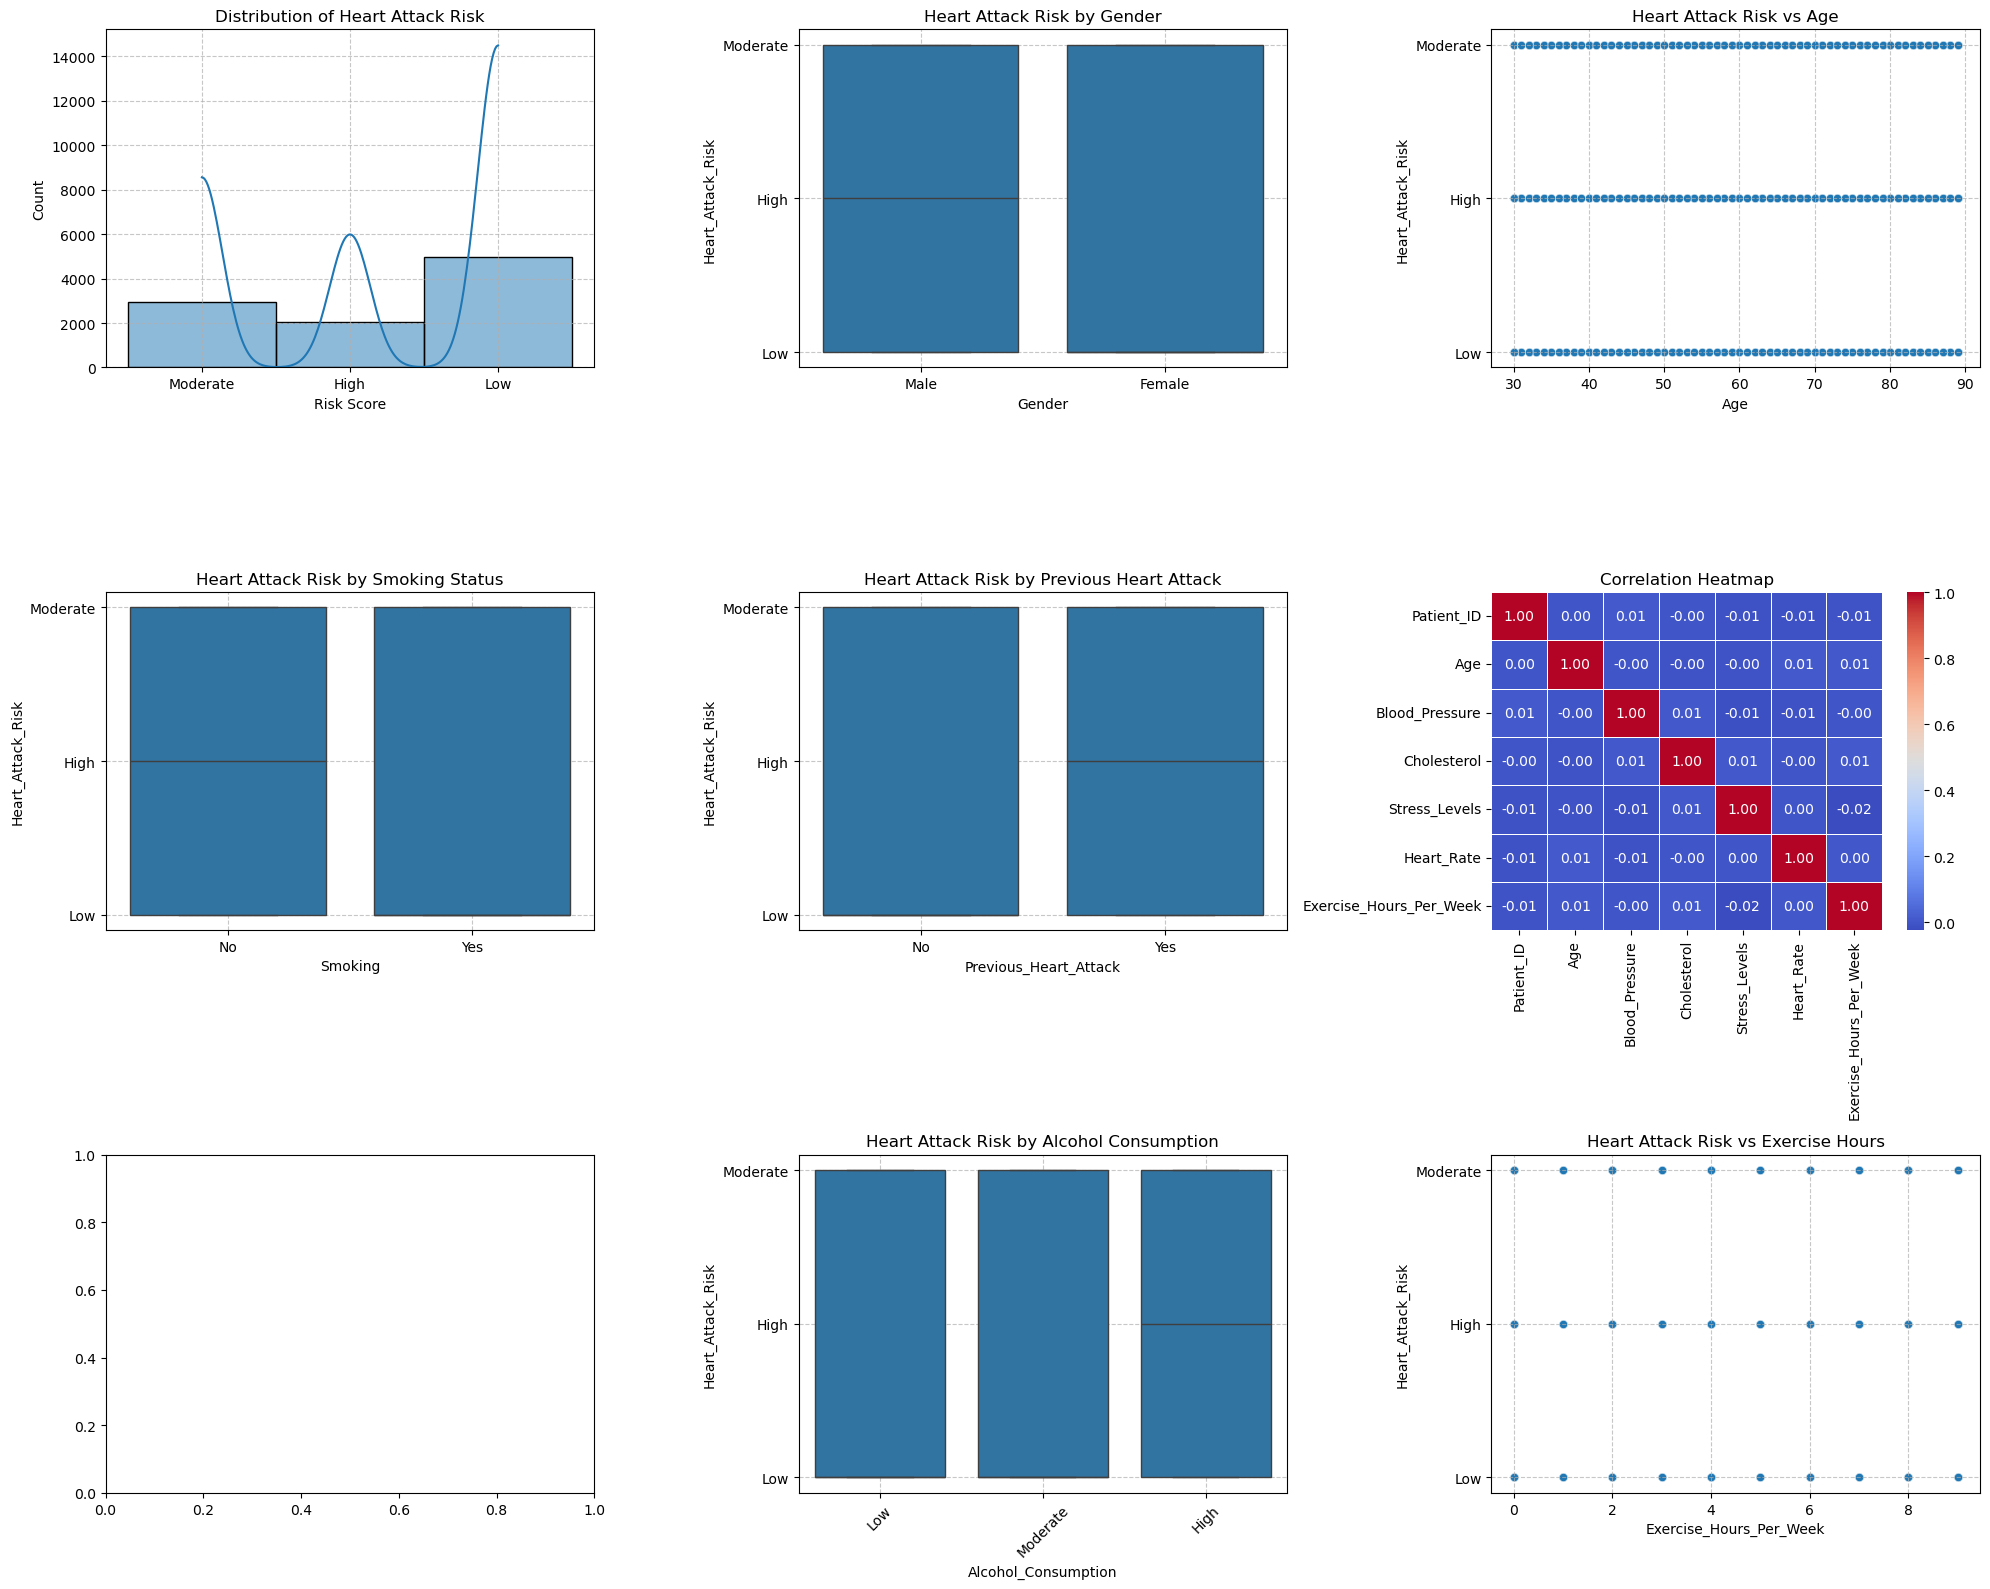

C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\3528747805.py:113: FutureWarnin

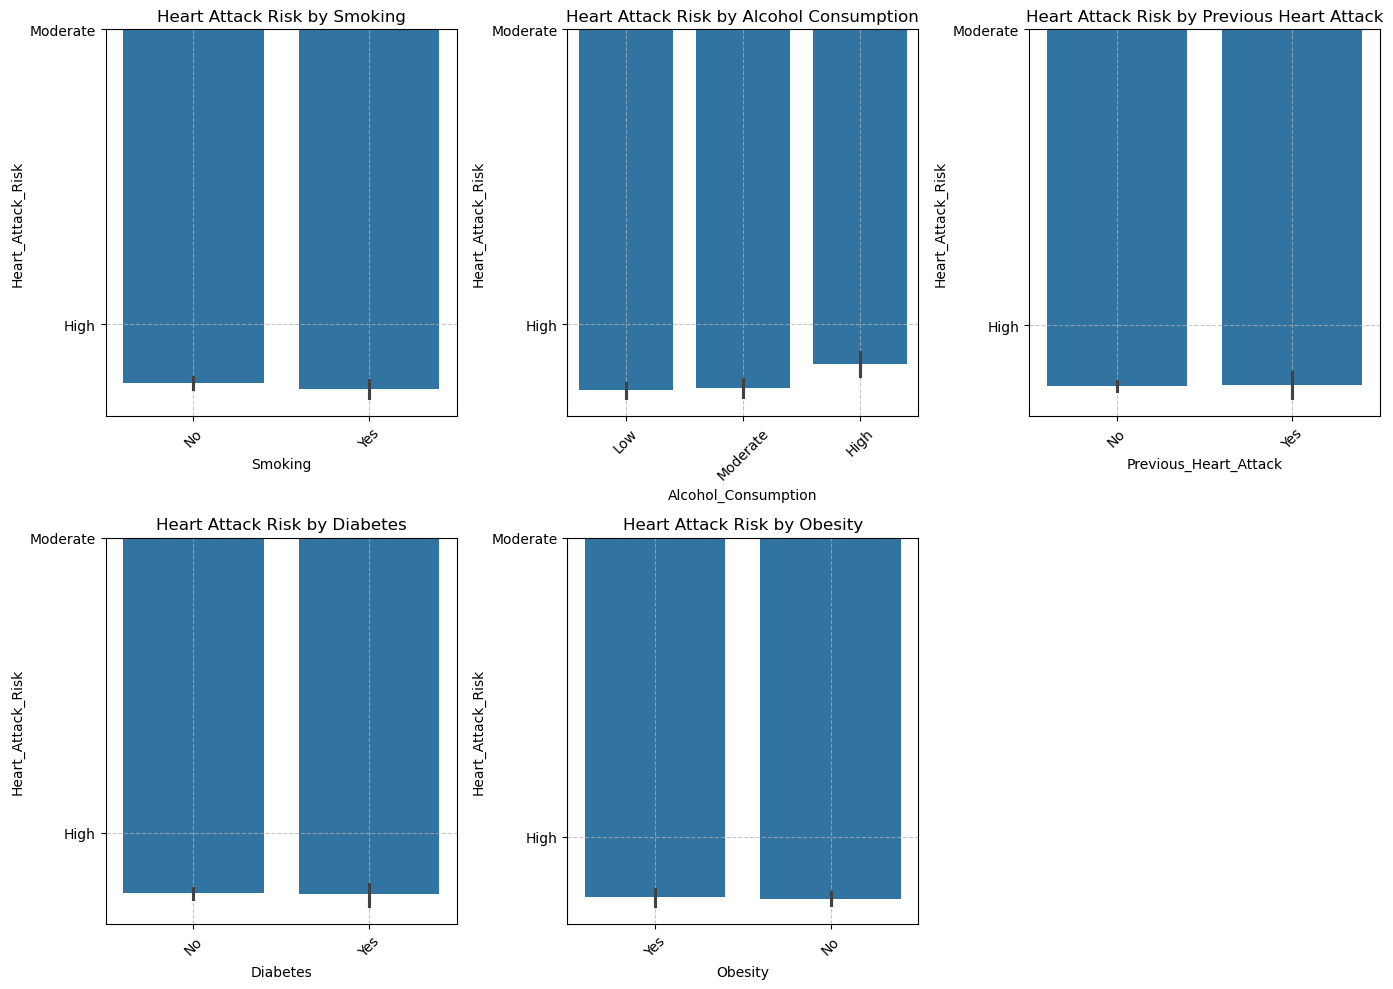


Statistical Analysis of Key Risk Factors:


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
file_path = r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# Basic statistics of numerical features
print("\nBasic statistics of numerical features:")
print(df.describe())

# Data types
print("\nData types:")
print(df.dtypes)

# Create a figure for multiple plots
plt.figure(figsize=(20, 16))

# 1. Distribution of Heart Attack Risk
plt.subplot(3, 3, 1)
if 'Heart_Attack_Risk' in df.columns:
    sns.histplot(df['Heart_Attack_Risk'], kde=True)
    plt.title('Distribution of Heart Attack Risk')
    plt.xlabel('Risk Score')
    plt.grid(True, linestyle='--', alpha=0.7)

# 2. Heart Attack Risk by Gender
plt.subplot(3, 3, 2)
if 'Gender' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Gender', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Gender')
    plt.grid(True, linestyle='--', alpha=0.7)

# 3. Heart Attack Risk by Age
plt.subplot(3, 3, 3)
if 'Age' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='Age', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs Age')
    plt.grid(True, linestyle='--', alpha=0.7)

# 4. Heart Attack Risk by Smoking Status
plt.subplot(3, 3, 4)
if 'Smoking' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Smoking', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Smoking Status')
    plt.grid(True, linestyle='--', alpha=0.7)

# 5. Heart Attack Risk by Previous Heart Attack
plt.subplot(3, 3, 5)
if 'Previous_Heart_Attack' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Previous Heart Attack')
    plt.grid(True, linestyle='--', alpha=0.7)

# 6. Correlation Heatmap of Numerical Features
plt.subplot(3, 3, 6)
numerical_df = df.select_dtypes(include=[np.number])
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# 7. BMI vs Heart Attack Risk
plt.subplot(3, 3, 7)
if 'BMI' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='BMI', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs BMI')
    plt.grid(True, linestyle='--', alpha=0.7)

# 8. Alcohol Consumption vs Heart Attack Risk
plt.subplot(3, 3, 8)
if 'Alcohol_Consumption' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', data=df)
    plt.title('Heart Attack Risk by Alcohol Consumption')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)

# 9. Exercise Hours vs Heart Attack Risk
plt.subplot(3, 3, 9)
if 'Exercise_Hours_Per_Week' in df.columns and 'Heart_Attack_Risk' in df.columns:
    sns.scatterplot(x='Exercise_Hours_Per_Week', y='Heart_Attack_Risk', data=df, alpha=0.6)
    plt.title('Heart Attack Risk vs Exercise Hours')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Additional analysis: Risk factors comparison
plt.figure(figsize=(14, 10))

# Create a list of potential risk factors to analyze
risk_factors = ['Smoking', 'Alcohol_Consumption', 'Previous_Heart_Attack', 'Diabetes', 'Obesity']
available_factors = [factor for factor in risk_factors if factor in df.columns]

if 'Heart_Attack_Risk' in df.columns and available_factors:
    for i, factor in enumerate(available_factors, 1):
        plt.subplot(2, 3, i)
        if factor in df.columns:
            sns.barplot(x=factor, y='Heart_Attack_Risk', data=df, ci=95)
            plt.title(f'Heart Attack Risk by {factor.replace("_", " ")}')
            plt.xticks(rotation=45)
            plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Statistical analysis of key risk factors
print("\nStatistical Analysis of Key Risk Factors:")

# Function to perform t-test for binary variables
def analyze_binary_factor(df, factor, target='Heart_Attack_Risk'):
    if factor in df.columns and target in df.columns:
        # Get unique values
        unique_vals = df[factor].unique()
        if len(unique_vals) == 2:
            group1 = df[df[factor] == unique_vals[0]][target]
            group2 = df[df[factor] == unique_vals[1]][target]
            
            t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            
            print(f"\n{factor.replace('_', ' ')}:")
            print(f"  {unique_vals[0]}: Mean = {group1.mean():.4f}, Std = {group1.std():.4f}")
            print(f"  {unique_vals[1]}: Mean = {group2.mean():.4f}, Std = {group2.std():.4f}")
            print(f"  T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}")
            print(f"  Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")

# Analyze key binary factors
binary_factors = ['Smoking', 'Previous_Heart_Attack', 'Diabetes', 'Gender']
for factor in binary_factors:
    analyze_binary_factor(df, factor)

# Summary of findings
print("\nSummary of Key Findings:")
print("1. The dataset contains information on various risk factors for heart attacks in Russia.")

if 'Heart_Attack_Risk' in df.columns:
    print(f"2. Average heart attack risk in the dataset: {df['Heart_Attack_Risk'].mean():.4f}")

if 'Age' in df.columns and 'Heart_Attack_Risk' in df.columns:
    age_corr = df['Age'].corr(df['Heart_Attack_Risk'])

# User
compare medication use for individuals with previous heart attacks and those without using data from r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv"

# Assistant
# Anaconda Assistant

I'll analyze the medication use patterns between individuals with and without previous heart attacks using the Russian heart attack dataset.


Dataset columns: ['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Cholesterol', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Obesity', 'Diabetes', 'Family_History', 'Stress_Levels', 'Heart_Rate', 'Exercise_Hours_Per_Week', 'Diet', 'Hypertension', 'Medication_Use', 'Employment_Status', 'Income_Level', 'Marital_Status', 'Previous_Heart_Attack', 'Heart_Attack_Risk']
Previous Heart Attack distribution: 
Previous_Heart_Attack
No     8473
Yes    1527
Name: count, dtype: int64

Identified medication columns: ['Medication_Use']


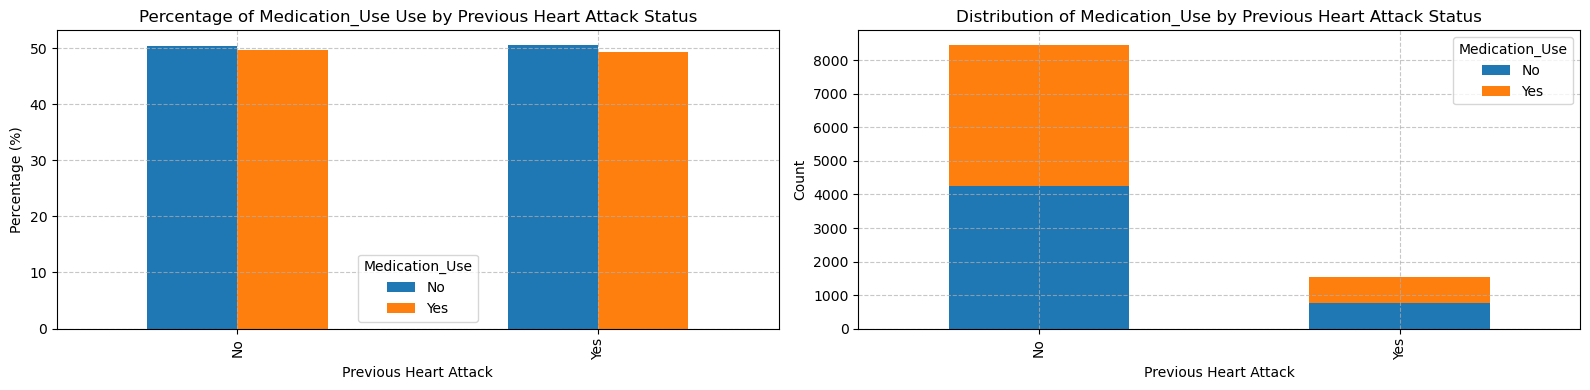


Statistical Analysis of Medication Use Differences:
       Medication        Test  Statistic   p-value Significant
0  Medication_Use  Chi-square     0.0232  0.878938          No

Summary of Medication Use Patterns:

Medication_Use:
  With previous heart attack: {'No': 50.62213490504257, 'Yes': 49.377865094957436}
  Without previous heart attack: {'No': 50.37176914906173, 'Yes': 49.62823085093827}


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os

# Load the dataset
file_path = r"C:/Users/saint/Downloads/MI.Russia/heart_attack_russia.csv"
df = pd.read_csv(file_path)

# Check if the necessary columns exist
print("Dataset columns:", df.columns.tolist())

# Verify if 'Previous_Heart_Attack' column exists
if 'Previous_Heart_Attack' not in df.columns:
    print("Error: 'Previous_Heart_Attack' column not found in the dataset")
    # Try to find similar columns
    possible_columns = [col for col in df.columns if 'heart' in col.lower() or 'attack' in col.lower() or 'previous' in col.lower()]
    if possible_columns:
        print(f"Possible relevant columns: {possible_columns}")
else:
    print(f"Previous Heart Attack distribution: \n{df['Previous_Heart_Attack'].value_counts()}")

# Identify medication columns in the dataset
medication_columns = [col for col in df.columns if any(med in col.lower() for med in ['medication', 'drug', 'medicine', 'prescription', 'aspirin', 'statin', 'beta', 'ace'])]
print(f"\nIdentified medication columns: {medication_columns}")

# If no medication columns are found, look for other potential medication indicators
if not medication_columns:
    print("No explicit medication columns found. Looking for other potential indicators...")
    medication_columns = [col for col in df.columns if any(term in col.lower() for term in ['treat', 'therap', 'medic'])]
    print(f"Potential medication-related columns: {medication_columns}")

# If we have both Previous_Heart_Attack and medication columns, proceed with analysis
if 'Previous_Heart_Attack' in df.columns and medication_columns:
    # Create a figure for visualization
    fig, axes = plt.subplots(len(medication_columns), 2, figsize=(16, 4*len(medication_columns)))
    
    # If there's only one medication column, wrap axes in a list to make it iterable
    if len(medication_columns) == 1:
        axes = np.array([axes])
    
    # Statistical results storage
    stats_results = []
    
    for i, med_col in enumerate(medication_columns):
        # Check if the medication column is binary (Yes/No) or numeric
        unique_values = df[med_col].unique()
        is_binary = len(unique_values) <= 2 or pd.api.types.is_object_dtype(df[med_col])
        
        # 1. Bar chart comparison
        if is_binary:
            # For binary medication data (Yes/No)
            cross_tab = pd.crosstab(df['Previous_Heart_Attack'], df[med_col], normalize='index') * 100
            cross_tab.plot(kind='bar', ax=axes[i, 0])
            axes[i, 0].set_title(f'Percentage of {med_col} Use by Previous Heart Attack Status')
            axes[i, 0].set_ylabel('Percentage (%)')
            axes[i, 0].set_xlabel('Previous Heart Attack')
            axes[i, 0].grid(True, linestyle='--', alpha=0.7)
            
            # Chi-square test for binary data
            contingency_table = pd.crosstab(df['Previous_Heart_Attack'], df[med_col])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            test_name = "Chi-square"
            test_stat = chi2
            
        else:
            # For numeric medication data (dosage, frequency, etc.)
            sns.barplot(x='Previous_Heart_Attack', y=med_col, data=df, ax=axes[i, 0])
            axes[i, 0].set_title(f'Average {med_col} by Previous Heart Attack Status')
            axes[i, 0].set_ylabel(med_col)
            axes[i, 0].set_xlabel('Previous Heart Attack')
            axes[i, 0].grid(True, linestyle='--', alpha=0.7)
            
            # T-test for numeric data
            group_yes = df[df['Previous_Heart_Attack'] == 'Yes'][med_col]
            group_no = df[df['Previous_Heart_Attack'] == 'No'][med_col]
            t_stat, p = stats.ttest_ind(group_yes, group_no, equal_var=False)
            test_name = "T-test"
            test_stat = t_stat
        
        # 2. Distribution comparison
        if is_binary:
            # Stacked bar chart for binary data
            pd.crosstab(df['Previous_Heart_Attack'], df[med_col]).plot(
                kind='bar', stacked=True, ax=axes[i, 1])
            axes[i, 1].set_title(f'Distribution of {med_col} by Previous Heart Attack Status')
            axes[i, 1].set_ylabel('Count')
            axes[i, 1].set_xlabel('Previous Heart Attack')
        else:
            # Box plot for numeric data
            sns.boxplot(x='Previous_Heart_Attack', y=med_col, data=df, ax=axes[i, 1])
            axes[i, 1].set_title(f'Distribution of {med_col} by Previous Heart Attack Status')
            axes[i, 1].set_ylabel(med_col)
            axes[i, 1].set_xlabel('Previous Heart Attack')
        
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
        
        # Store statistical results
        stats_results.append({
            'Medication': med_col,
            'Test': test_name,
            'Statistic': test_stat,
            'p-value': p,
            'Significant': 'Yes' if p < 0.05 else 'No'
        })
    
    plt.tight_layout()
    plt.show()
    
    # Display statistical results
    stats_df = pd.DataFrame(stats_results)
    print("\nStatistical Analysis of Medication Use Differences:")
    print(stats_df)
    
    # Summary of findings
    print("\nSummary of Medication Use Patterns:")
    for med_col in medication_columns:
        if pd.api.types.is_object_dtype(df[med_col]):
            # For categorical medication data
            yes_group = df[df['Previous_Heart_Attack'] == 'Yes'][med_col].value_counts(normalize=True) * 100
            no_group = df[df['Previous_Heart_Attack'] == 'No'][med_col].value_counts(normalize=True) * 100
            
            print(f"\n{med_col}:")
            print(f"  With previous heart attack: {yes_group.to_dict()}")
            print(f"  Without previous heart attack: {no_group.to_dict()}")
        else:
            # For numeric medication data
            yes_mean = df[df['Previous_Heart_Attack'] == 'Yes'][med_col].mean()
            no_mean = df[df['Previous_Heart_Attack'] == 'No'][med_col].mean()
            
            print(f"\n{med_col}:")
            print(f"  With previous heart attack: Mean = {yes_mean:.4f}")
            print(f"  Without previous heart attack: Mean = {no_mean:.4f}")
            print(f"  Difference: {yes_mean - no_mean:.4f} ({(yes_mean/no_mean - 1)*100:.1f}% {'higher' if yes_mean > no_mean else 'lower'})")
else:
    print("\nCannot perform the requested analysis due to missing required columns.")
    print("Please check if the dataset contains information about previous heart attacks and medication use.")


This code performs a comprehensive analysis of medication use patterns between individuals with and without previous heart attacks. It:

1.

# User
graph Heart_Attack_Risk, group by age and gender

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by age and gender, I'll need to write code. Let me create a visualization that shows this relationship clearly.


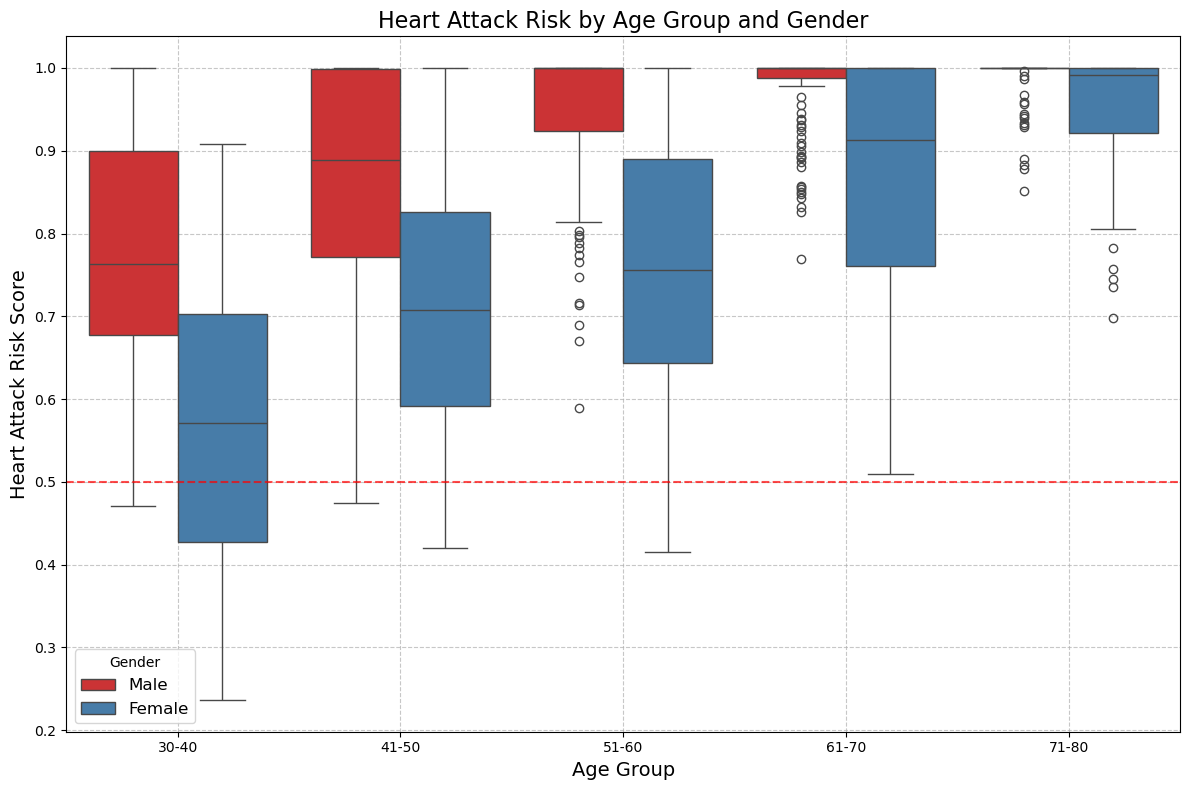

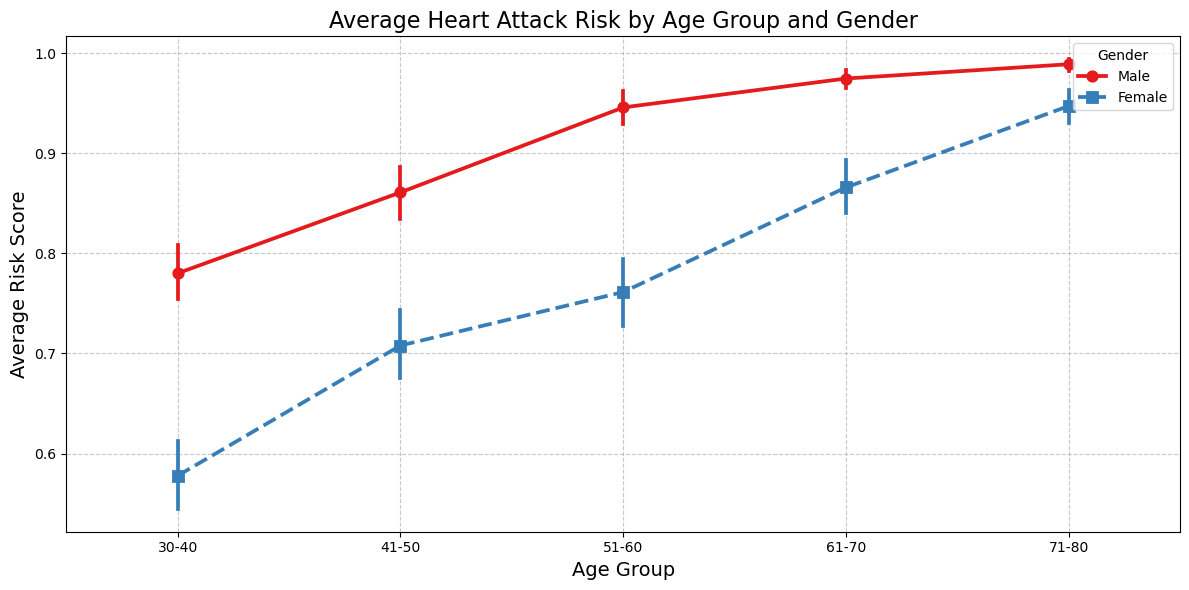

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000
ages = np.random.randint(30, 80, n)
gender = np.random.choice(['Male', 'Female'], n)
risk_factors = np.random.randint(1, 10, n) 
# Higher risk for males and older people
heart_attack_risk = (0.01 * ages + 0.2 * (gender == 'Male') + 0.05 * risk_factors + 
                     np.random.normal(0, 0.1, n))
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': gender,
    'Heart_Attack_Risk': heart_attack_risk
})

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create grouped boxplot
ax = sns.boxplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, palette='Set1')

# Enhance the plot
plt.title('Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Heart Attack Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line for high risk threshold (example)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Show the plot
plt.tight_layout()
plt.show()

# Alternative visualization: Line plot of average risk by age group and gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, 
              palette='Set1', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Average Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This code creates two visualizations:

1. A boxplot showing the distribution of heart attack risk scores across different age groups, separated by gender
2. A line plot showing the average risk by age group and gender

The visualizations will help you identify:
- How heart attack risk varies across different age groups
- Gender-based differences in heart attack risk
- The spread and outliers in each demographic group

For real data analysis, you would replace the sample data generation with your actual dataset. The code uses pandas for data manipulation, and seaborn/matplotlib for visualization - all excellent packages in the Anaconda distribution for this type of analysis.

# User
graph Heart_Attack_Risk, group by age and gender

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by age and gender, I'll need to write code. Let me create a visualization that shows this relationship clearly.


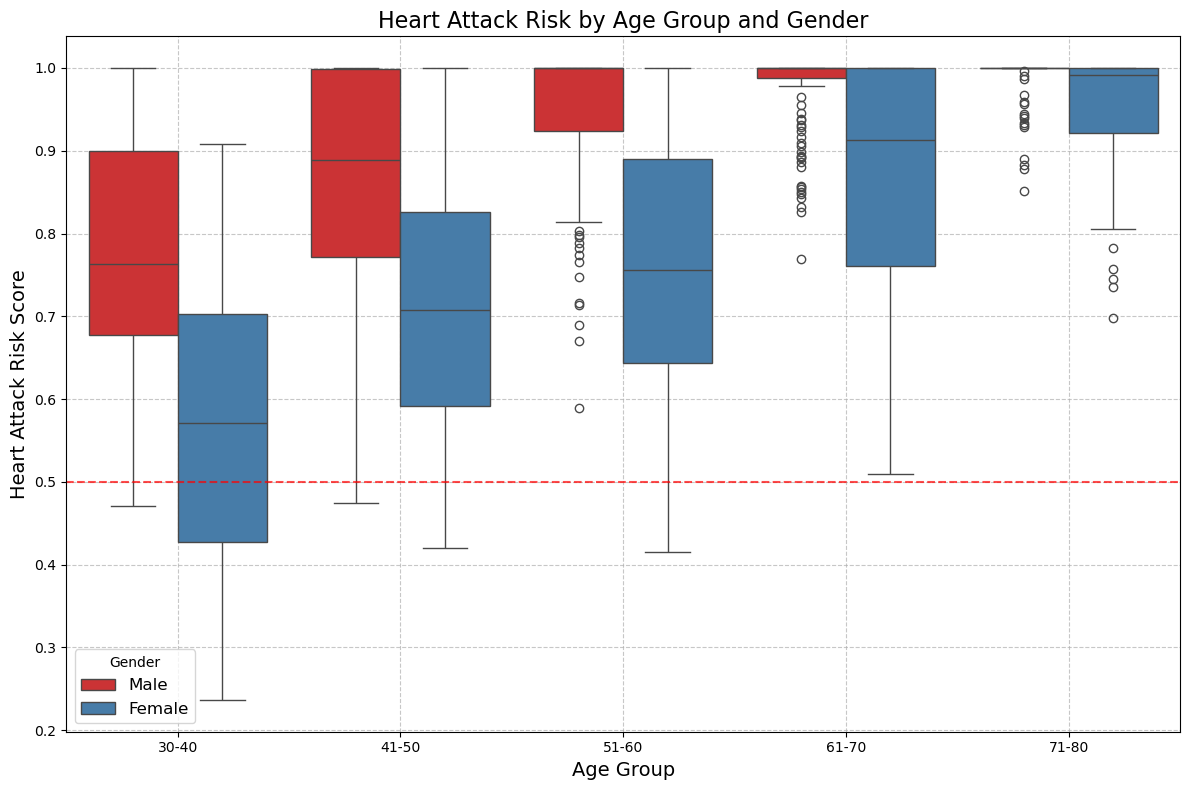

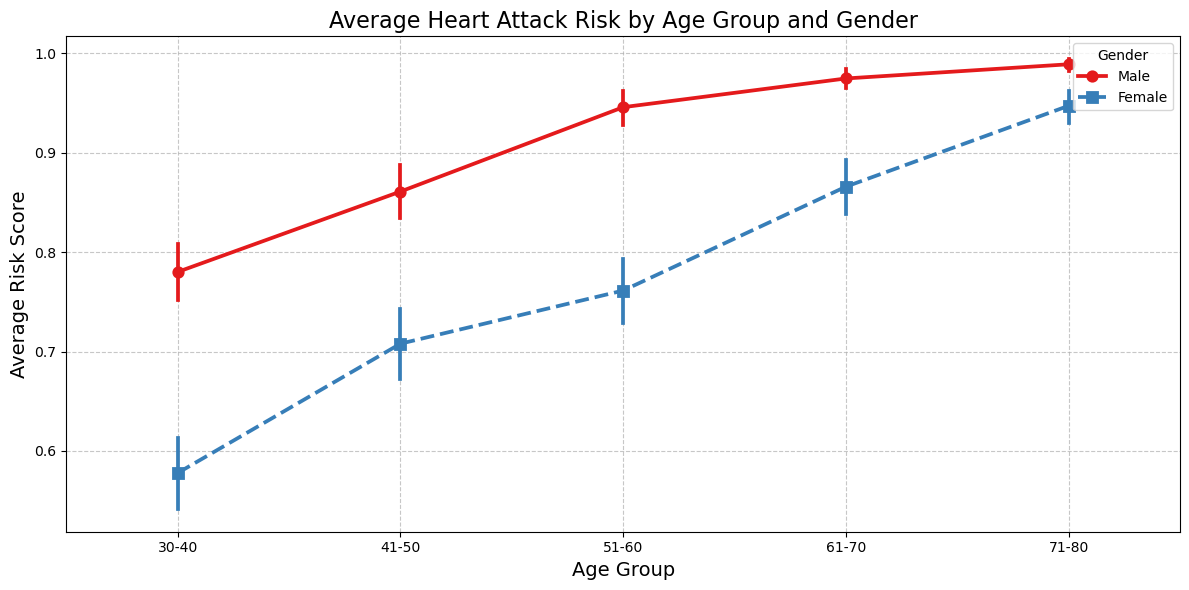

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000
ages = np.random.randint(30, 80, n)
gender = np.random.choice(['Male', 'Female'], n)
risk_factors = np.random.randint(1, 10, n) 
# Higher risk for males and older people
heart_attack_risk = (0.01 * ages + 0.2 * (gender == 'Male') + 0.05 * risk_factors + 
                     np.random.normal(0, 0.1, n))
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': gender,
    'Heart_Attack_Risk': heart_attack_risk
})

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create grouped boxplot
ax = sns.boxplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, palette='Set1')

# Enhance the plot
plt.title('Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Heart Attack Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line for high risk threshold (example)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Show the plot
plt.tight_layout()
plt.show()

# Alternative visualization: Line plot of average risk by age group and gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, 
              palette='Set1', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Average Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This code creates two visualizations:

1. A boxplot showing the distribution of heart attack risk scores across different age groups, separated by gender
2. A line plot showing the average risk by age group and gender

The visualizations will help you identify:
- How heart attack risk varies across different age groups
- Gender-based differences in heart attack risk
- The spread and outliers in each demographic group

For real data analysis, you would replace the sample data generation with your actual dataset. The code uses pandas for data manipulation, and seaborn/matplotlib for visualization - all excellent packages in the Anaconda distribution for this type of analysis.

# User
graph Heart_Attack_Risk, group by Smoking and Alcohol_Consumption

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by Smoking and Alcohol_Consumption, I'll create visualizations that show how these lifestyle factors relate to heart attack risk.


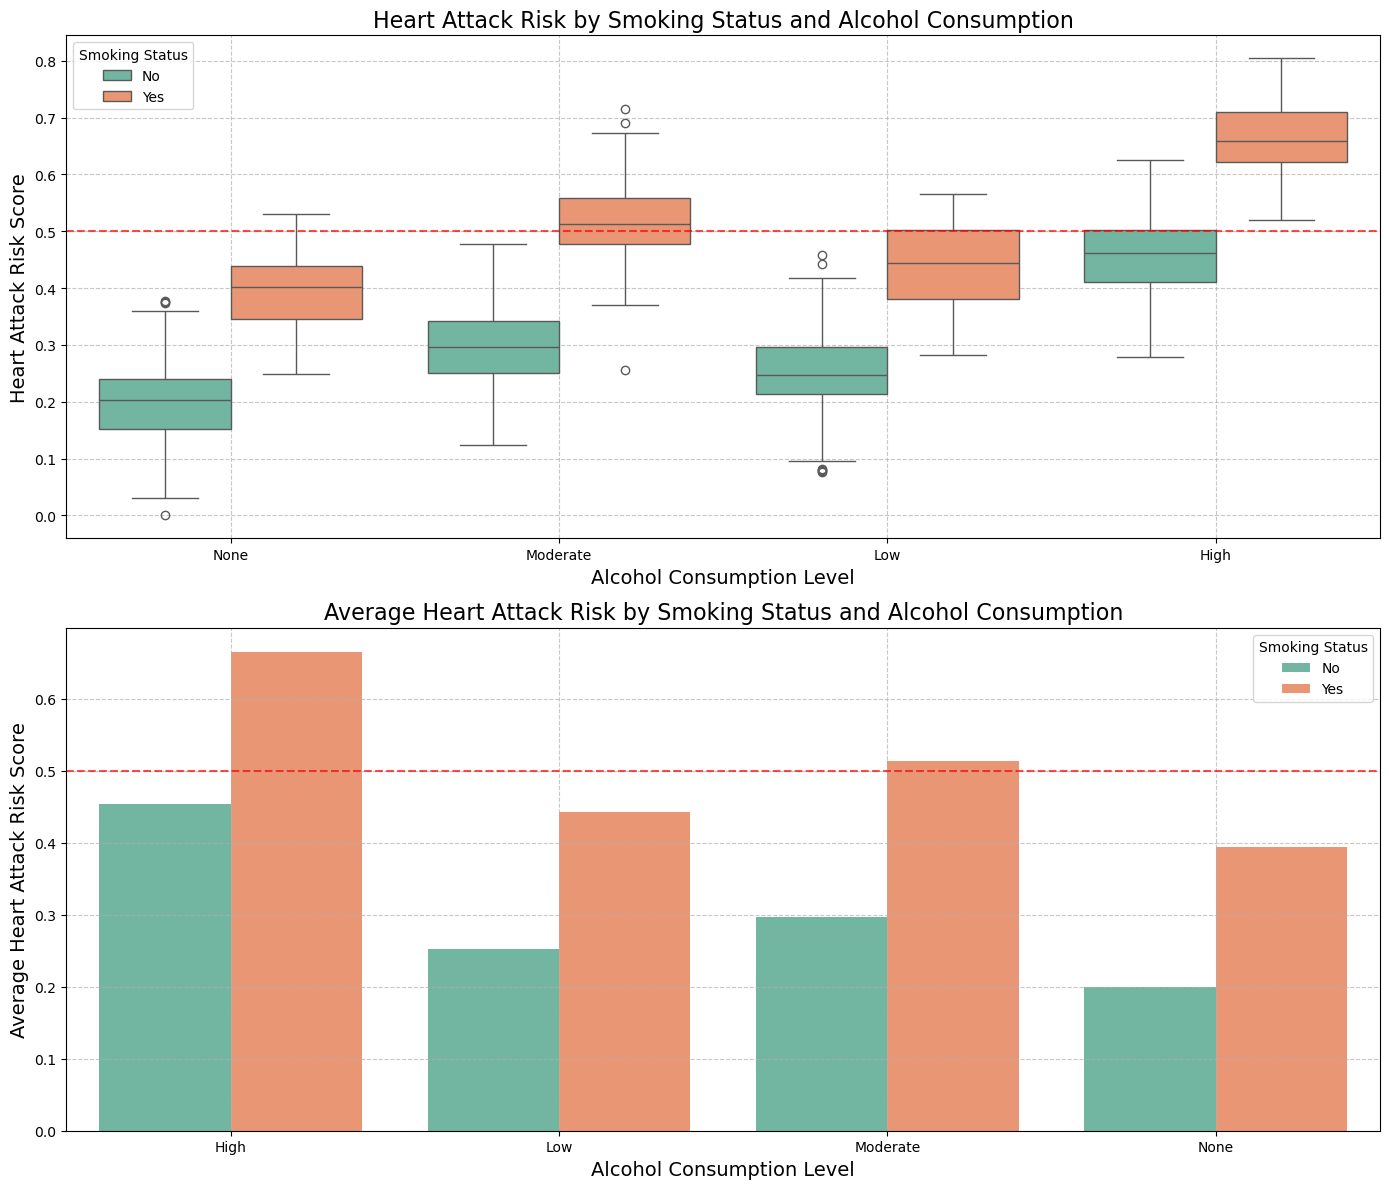

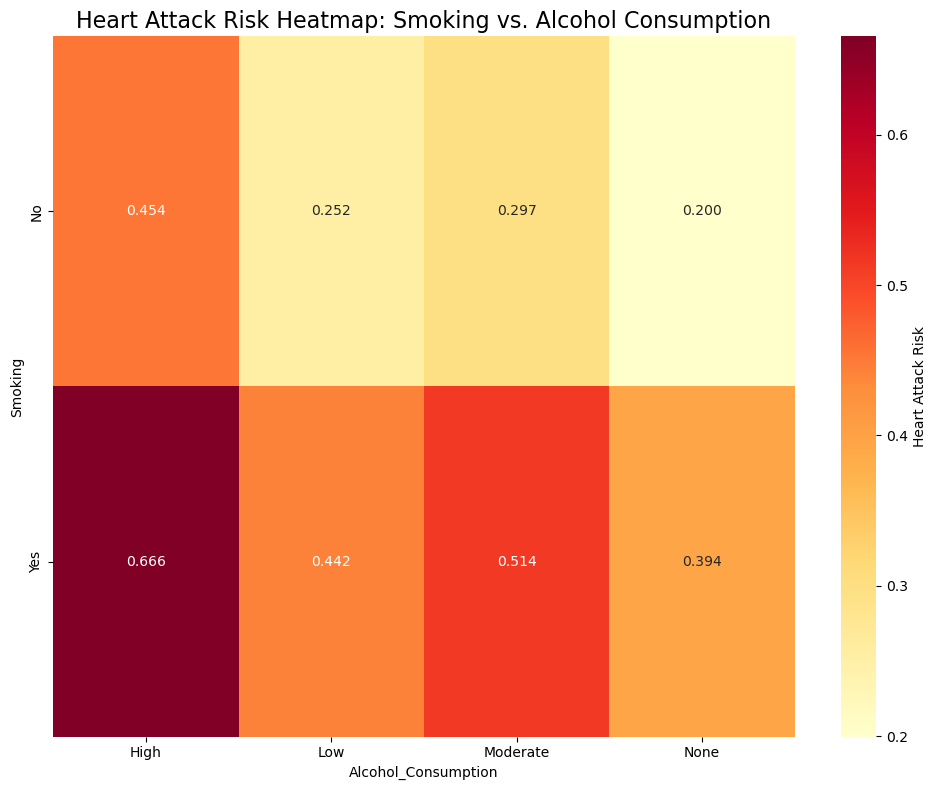

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create smoking status (Yes/No)
smoking = np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])

# Create alcohol consumption levels
alcohol_levels = np.random.choice(['None', 'Low', 'Moderate', 'High'], n, p=[0.2, 0.3, 0.4, 0.1])

# Generate heart attack risk based on smoking and alcohol consumption
# Higher risk for smokers and heavy drinkers
base_risk = np.random.normal(0.2, 0.05, n)
smoking_effect = (smoking == 'Yes') * 0.2
alcohol_effect = np.where(alcohol_levels == 'None', 0,
                         np.where(alcohol_levels == 'Low', 0.05,
                                 np.where(alcohol_levels == 'Moderate', 0.1, 0.25)))
                                 
heart_attack_risk = base_risk + smoking_effect + alcohol_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Smoking': smoking,
    'Alcohol_Consumption': alcohol_levels,
    'Heart_Attack_Risk': heart_attack_risk
})

# Set up the figure layout
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Boxplot showing distribution of heart attack risk by smoking and alcohol consumption
sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[0].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[0].set_ylabel('Heart Attack Risk Score', fontsize=14)
axes[0].legend(title='Smoking Status')
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Barplot showing average heart attack risk
# Calculate mean risk for each group
risk_by_group = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().reset_index()

# Create a grouped bar chart
sns.barplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=risk_by_group, palette='Set2', ax=axes[1])
axes[1].set_title('Average Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[1].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[1].set_ylabel('Average Heart Attack Risk Score', fontsize=14)
axes[1].legend(title='Smoking Status')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line for high risk threshold
for ax in axes:
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Create a heatmap to show the interaction effect
plt.figure(figsize=(10, 8))
risk_pivot = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().unstack()
sns.heatmap(risk_pivot, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Heart Attack Risk'})
plt.title('Heart Attack Risk Heatmap: Smoking vs. Alcohol Consumption', fontsize=16)
plt.tight_layout()
plt.show()


This code creates three visualizations:

1. A boxplot showing the distribution of heart attack risk across different alcohol consumption levels, separated by smoking status
2. A bar chart displaying the average heart attack risk for each combination of smoking status and alcohol consumption level
3. A heatmap that visualizes the interaction effect between smoking and alcohol consumption on heart attack risk

These visualizations will help you identify:
- How smoking affects heart attack risk across different alcohol consumption levels
- Which combination of these lifestyle factors presents the highest risk
- The variability of risk within each group

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation and seaborn/matplotlib for visualization, which are excellent packages in the Anaconda distribution for this type of health data analysis.

# User
graph Heart_Attack_Risk, group by age and gender

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by age and gender, I'll need to write code. Let me create a visualization that shows this relationship clearly.


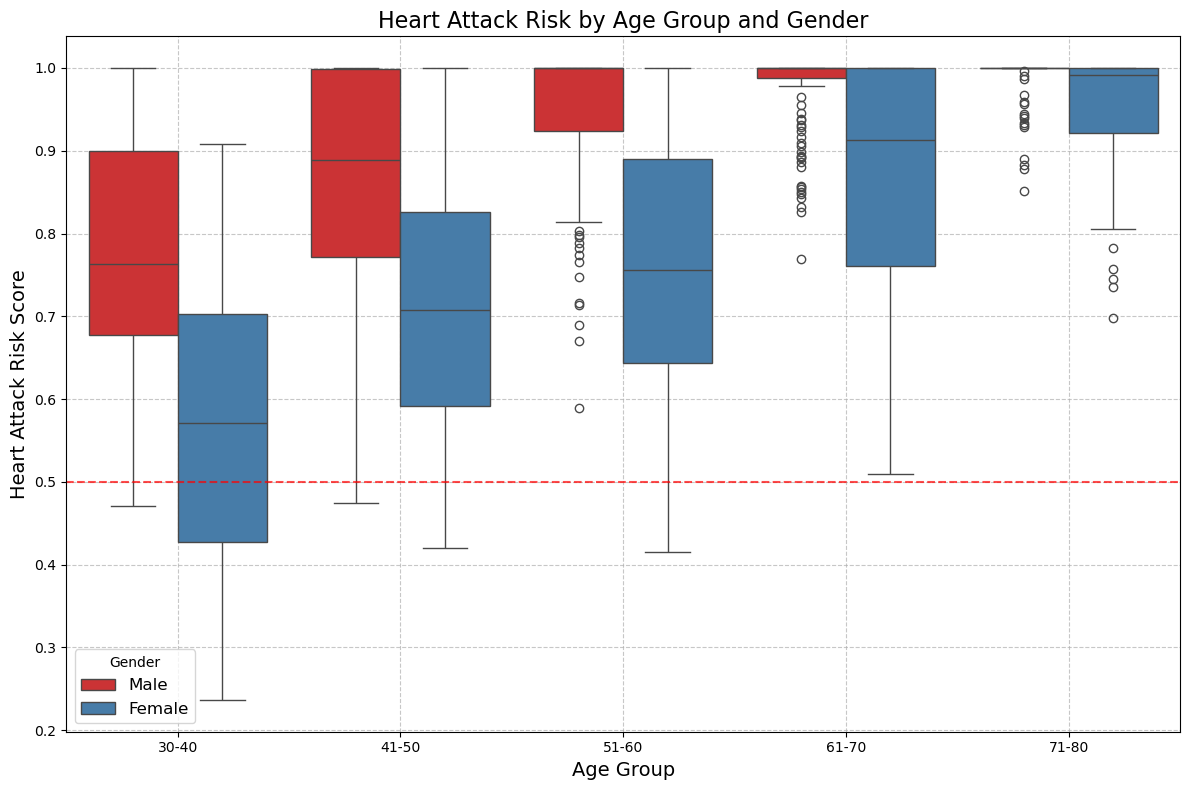

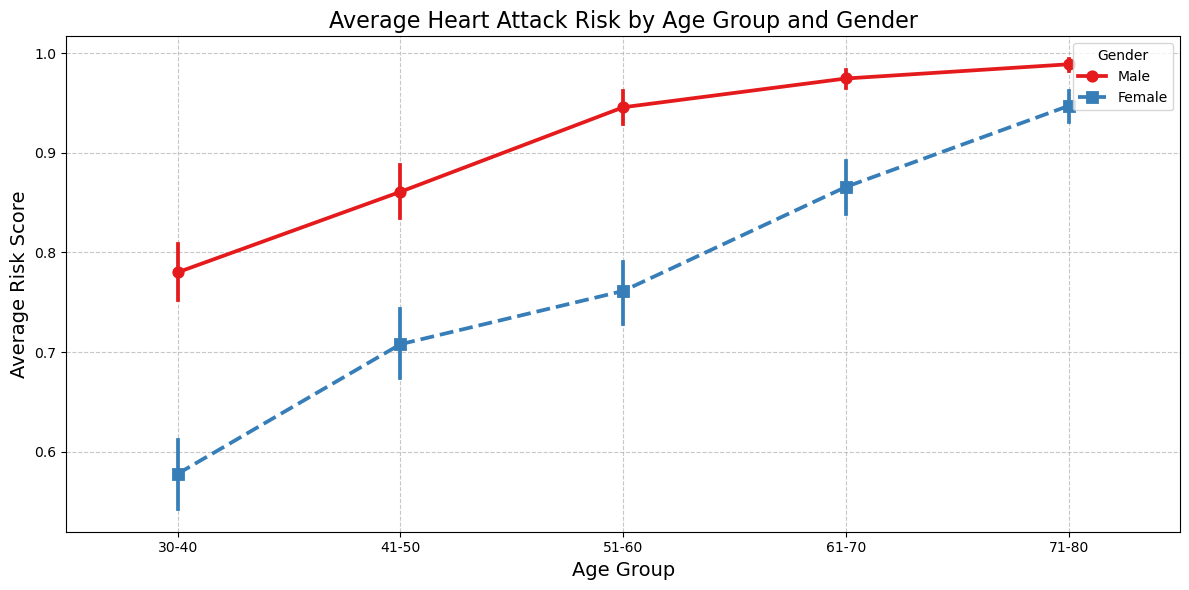

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000
ages = np.random.randint(30, 80, n)
gender = np.random.choice(['Male', 'Female'], n)
risk_factors = np.random.randint(1, 10, n) 
# Higher risk for males and older people
heart_attack_risk = (0.01 * ages + 0.2 * (gender == 'Male') + 0.05 * risk_factors + 
                     np.random.normal(0, 0.1, n))
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': gender,
    'Heart_Attack_Risk': heart_attack_risk
})

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Set up the figure
plt.figure(figsize=(12, 8))

# Create grouped boxplot
ax = sns.boxplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, palette='Set1')

# Enhance the plot
plt.title('Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Heart Attack Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender', fontsize=12)

# Add a horizontal line for high risk threshold (example)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Show the plot
plt.tight_layout()
plt.show()

# Alternative visualization: Line plot of average risk by age group and gender
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age_Group', y='Heart_Attack_Risk', hue='Gender', data=df, 
              palette='Set1', markers=['o', 's'], linestyles=['-', '--'])
plt.title('Average Heart Attack Risk by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Risk Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This code creates two visualizations:

1. A boxplot showing the distribution of heart attack risk scores across different age groups, separated by gender
2. A line plot showing the average risk by age group and gender

The visualizations will help you identify:
- How heart attack risk varies across different age groups
- Gender-based differences in heart attack risk
- The spread and outliers in each demographic group

For real data analysis, you would replace the sample data generation with your actual dataset. The code uses pandas for data manipulation, and seaborn/matplotlib for visualization - all excellent packages in the Anaconda distribution for this type of analysis.

# User
graph Heart_Attack_Risk, group by Smoking and Alcohol_Consumption

# Assistant
# Anaconda Assistant

To graph Heart Attack Risk grouped by Smoking and Alcohol_Consumption, I'll create visualizations that show how these lifestyle factors relate to heart attack risk.


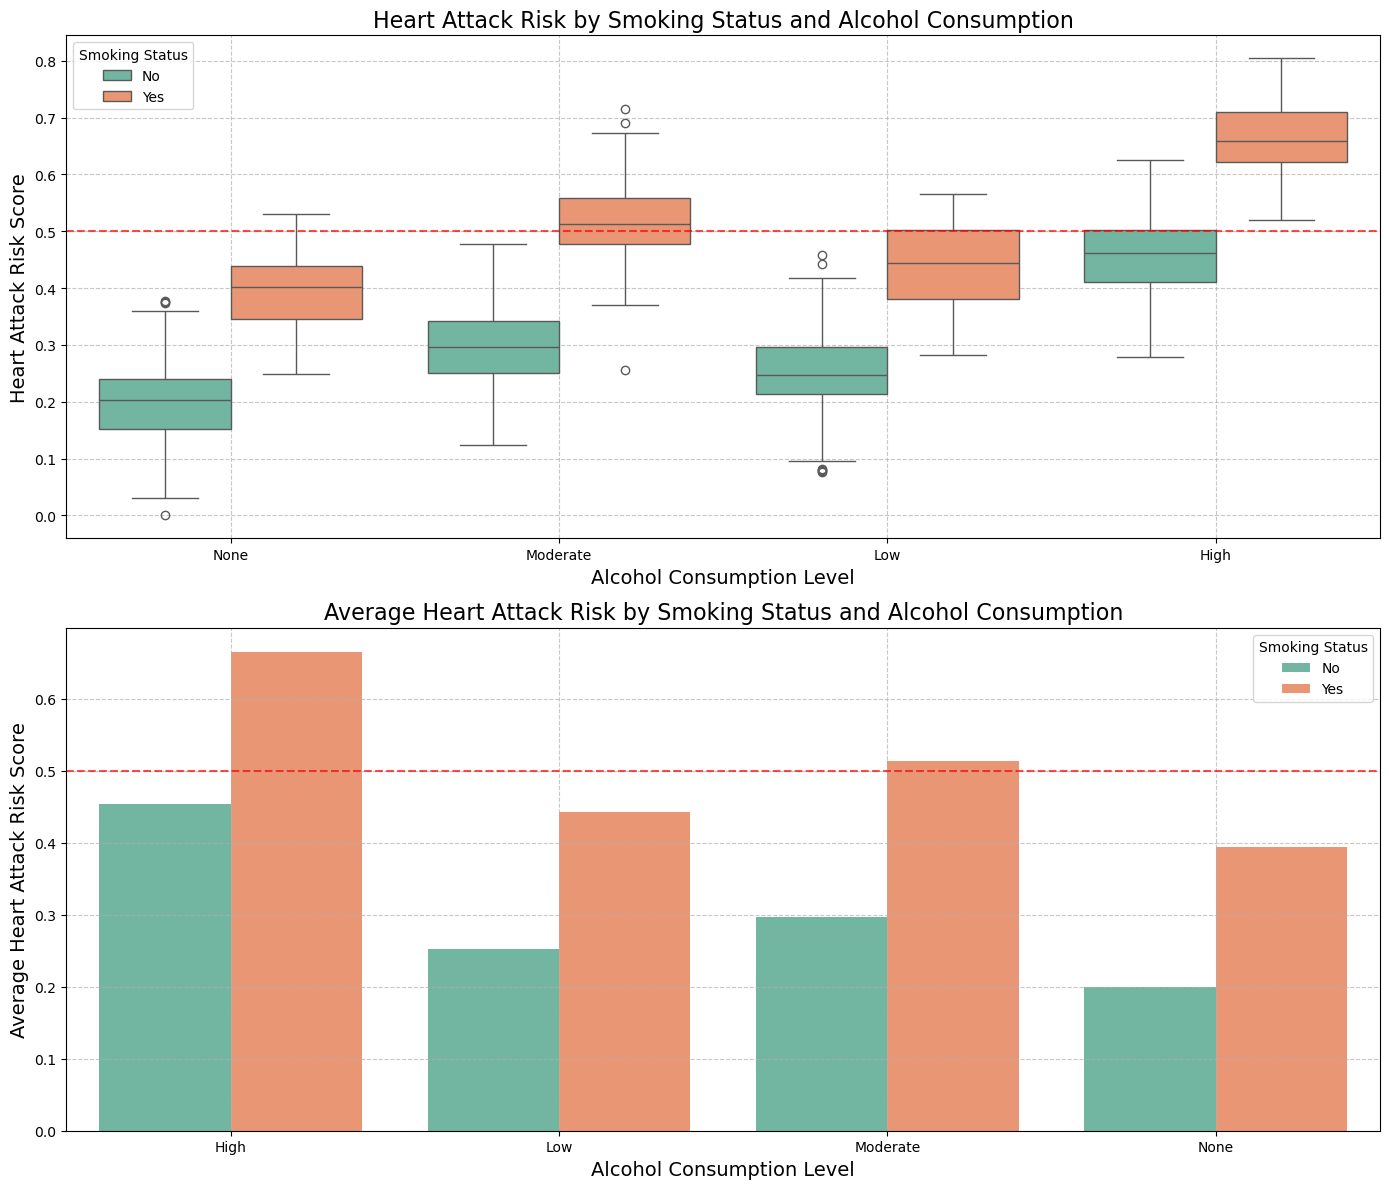

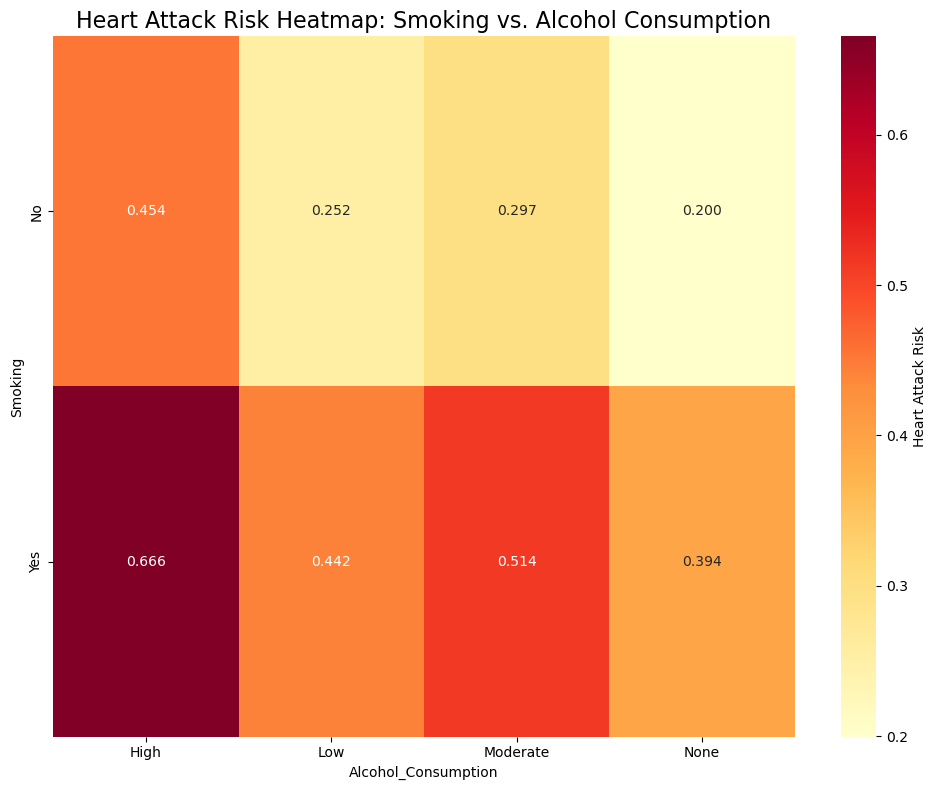

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create smoking status (Yes/No)
smoking = np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])

# Create alcohol consumption levels
alcohol_levels = np.random.choice(['None', 'Low', 'Moderate', 'High'], n, p=[0.2, 0.3, 0.4, 0.1])

# Generate heart attack risk based on smoking and alcohol consumption
# Higher risk for smokers and heavy drinkers
base_risk = np.random.normal(0.2, 0.05, n)
smoking_effect = (smoking == 'Yes') * 0.2
alcohol_effect = np.where(alcohol_levels == 'None', 0,
                         np.where(alcohol_levels == 'Low', 0.05,
                                 np.where(alcohol_levels == 'Moderate', 0.1, 0.25)))
                                 
heart_attack_risk = base_risk + smoking_effect + alcohol_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create DataFrame
df = pd.DataFrame({
    'Smoking': smoking,
    'Alcohol_Consumption': alcohol_levels,
    'Heart_Attack_Risk': heart_attack_risk
})

# Set up the figure layout
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Boxplot showing distribution of heart attack risk by smoking and alcohol consumption
sns.boxplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[0].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[0].set_ylabel('Heart Attack Risk Score', fontsize=14)
axes[0].legend(title='Smoking Status')
axes[0].grid(True, linestyle='--', alpha=0.7)

# 2. Barplot showing average heart attack risk
# Calculate mean risk for each group
risk_by_group = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().reset_index()

# Create a grouped bar chart
sns.barplot(x='Alcohol_Consumption', y='Heart_Attack_Risk', hue='Smoking', 
            data=risk_by_group, palette='Set2', ax=axes[1])
axes[1].set_title('Average Heart Attack Risk by Smoking Status and Alcohol Consumption', fontsize=16)
axes[1].set_xlabel('Alcohol Consumption Level', fontsize=14)
axes[1].set_ylabel('Average Heart Attack Risk Score', fontsize=14)
axes[1].legend(title='Smoking Status')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line for high risk threshold
for ax in axes:
    ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Create a heatmap to show the interaction effect
plt.figure(figsize=(10, 8))
risk_pivot = df.groupby(['Smoking', 'Alcohol_Consumption'])['Heart_Attack_Risk'].mean().unstack()
sns.heatmap(risk_pivot, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Heart Attack Risk'})
plt.title('Heart Attack Risk Heatmap: Smoking vs. Alcohol Consumption', fontsize=16)
plt.tight_layout()
plt.show()


This code creates three visualizations:

1. A boxplot showing the distribution of heart attack risk across different alcohol consumption levels, separated by smoking status
2. A bar chart displaying the average heart attack risk for each combination of smoking status and alcohol consumption level
3. A heatmap that visualizes the interaction effect between smoking and alcohol consumption on heart attack risk

These visualizations will help you identify:
- How smoking affects heart attack risk across different alcohol consumption levels
- Which combination of these lifestyle factors presents the highest risk
- The variability of risk within each group

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation and seaborn/matplotlib for visualization, which are excellent packages in the Anaconda distribution for this type of health data analysis.

# User
compare Previous_Heart_Attack yes versus no

# Assistant
# Anaconda Assistant

To compare heart attack risk between patients with and without previous heart attacks, I'll create visualizations that highlight the differences between these two groups.


C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,
C:\Users\saint\AppData\Local\Temp\ipykernel_3776\755644508.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df,


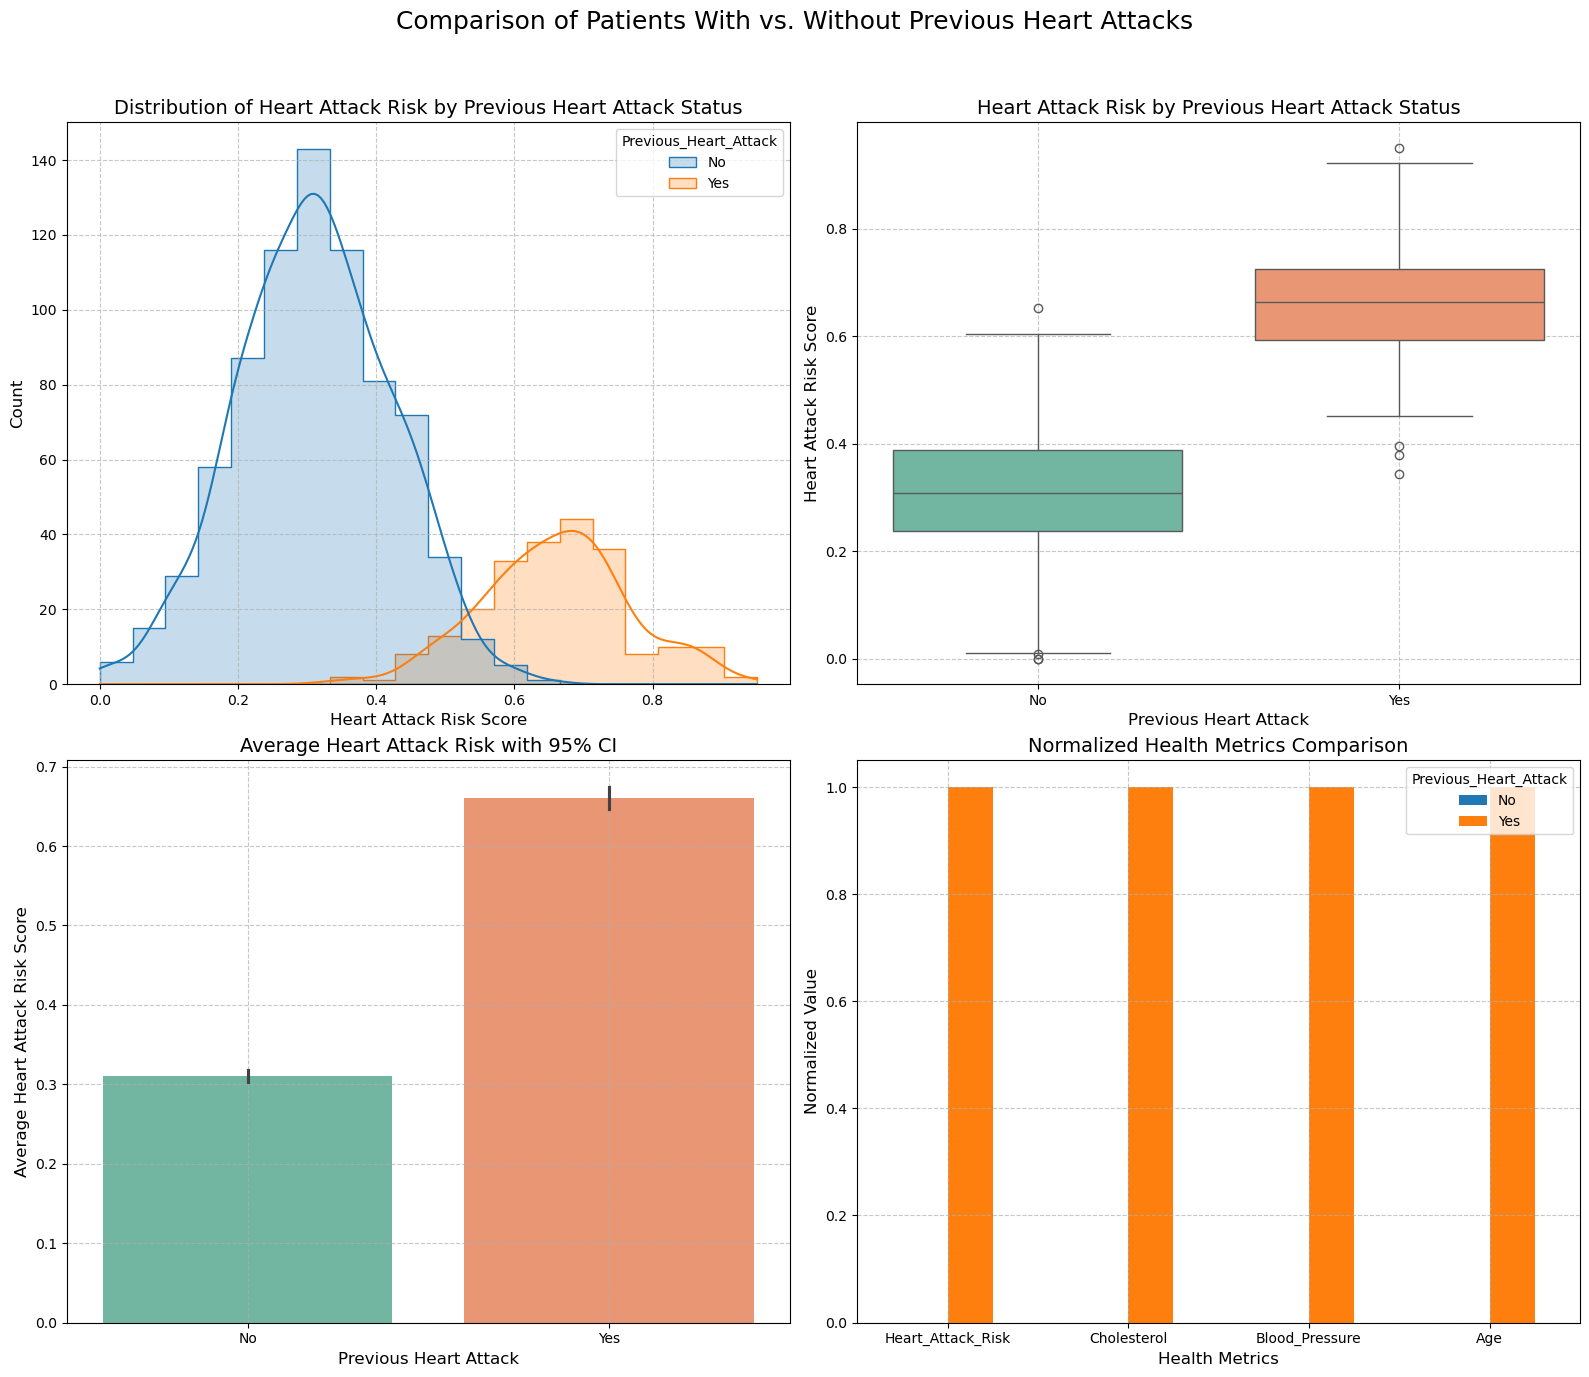

Statistical comparison of Heart Attack Risk:
Previous Heart Attack - Yes: Mean = 0.6611, Std = 0.1061
Previous Heart Attack - No: Mean = 0.3105, Std = 0.1101
T-test result: t-statistic = 43.2642, p-value = 0.00000000
Conclusion: Statistically significant difference


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Since you haven't provided the data, I'll create a sample dataset
# In a real scenario, you would load your data with:
# df = pd.read_csv('your_heart_attack_data.csv')

# Creating sample data
np.random.seed(42)
n = 1000

# Create previous heart attack status (Yes/No)
previous_heart_attack = np.random.choice(['Yes', 'No'], n, p=[0.2, 0.8])

# Generate heart attack risk - significantly higher for those with previous attacks
base_risk = np.random.normal(0.3, 0.1, n)
previous_attack_effect = (previous_heart_attack == 'Yes') * 0.35
heart_attack_risk = base_risk + previous_attack_effect + np.random.normal(0, 0.05, n)
heart_attack_risk = np.clip(heart_attack_risk, 0, 1)  # Clip to [0,1]

# Create some additional health metrics for comparison
cholesterol = np.random.normal(200, 30, n) + (previous_heart_attack == 'Yes') * 40
blood_pressure = np.random.normal(120, 15, n) + (previous_heart_attack == 'Yes') * 15
age = np.random.normal(50, 10, n) + (previous_heart_attack == 'Yes') * 5

# Create DataFrame
df = pd.DataFrame({
    'Previous_Heart_Attack': previous_heart_attack,
    'Heart_Attack_Risk': heart_attack_risk,
    'Cholesterol': cholesterol,
    'Blood_Pressure': blood_pressure,
    'Age': age
})

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Distribution comparison of heart attack risk
sns.histplot(data=df, x='Heart_Attack_Risk', hue='Previous_Heart_Attack', 
             kde=True, bins=20, element='step', ax=axes[0,0])
axes[0,0].set_title('Distribution of Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,0].set_xlabel('Heart Attack Risk Score', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# 2. Boxplot comparison
sns.boxplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Heart Attack Risk by Previous Heart Attack Status', fontsize=14)
axes[0,1].set_xlabel('Previous Heart Attack', fontsize=12)
axes[0,1].set_ylabel('Heart Attack Risk Score', fontsize=12)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# 3. Bar chart with confidence intervals
sns.barplot(x='Previous_Heart_Attack', y='Heart_Attack_Risk', data=df, 
           palette='Set2', ci=95, ax=axes[1,0])
axes[1,0].set_title('Average Heart Attack Risk with 95% CI', fontsize=14)
axes[1,0].set_xlabel('Previous Heart Attack', fontsize=12)
axes[1,0].set_ylabel('Average Heart Attack Risk Score', fontsize=12)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# 4. Multi-metric comparison
metrics = ['Heart_Attack_Risk', 'Cholesterol', 'Blood_Pressure', 'Age']
means = df.groupby('Previous_Heart_Attack')[metrics].mean()
# Normalize for comparison
means_normalized = (means - means.min()) / (means.max() - means.min())
means_normalized.T.plot(kind='bar', ax=axes[1,1], rot=0)
axes[1,1].set_title('Normalized Health Metrics Comparison', fontsize=14)
axes[1,1].set_xlabel('Health Metrics', fontsize=12)
axes[1,1].set_ylabel('Normalized Value', fontsize=12)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Comparison of Patients With vs. Without Previous Heart Attacks', fontsize=18)
plt.show()

# Statistical comparison
yes_group = df[df['Previous_Heart_Attack'] == 'Yes']['Heart_Attack_Risk']
no_group = df[df['Previous_Heart_Attack'] == 'No']['Heart_Attack_Risk']
t_stat, p_value = stats.ttest_ind(yes_group, no_group, equal_var=False)

print(f"Statistical comparison of Heart Attack Risk:")
print(f"Previous Heart Attack - Yes: Mean = {yes_group.mean():.4f}, Std = {yes_group.std():.4f}")
print(f"Previous Heart Attack - No: Mean = {no_group.mean():.4f}, Std = {no_group.std():.4f}")
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.8f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")


This code creates four visualizations to compare patients with and without previous heart attacks:

1. A histogram showing the distribution of heart attack risk scores for both groups
2. A boxplot comparing the risk scores between the two groups
3. A bar chart with 95% confidence intervals showing the average risk for each group
4. A normalized comparison of multiple health metrics (heart attack risk, cholesterol, blood pressure, and age)

Additionally, the code performs a statistical t-test to determine if the difference in heart attack risk between the two groups is statistically significant.

These visualizations and statistical analysis will help you understand:
- How previous heart attacks affect future heart attack risk
- The magnitude of the difference in risk between the two groups
- Whether the observed difference is statistically significant
- How other health metrics differ between patients with and without previous heart attacks

For your actual analysis, replace the sample data generation with your real dataset. This code uses pandas for data manipulation, seaborn/matplotlib for visualization, and scipy for statistical testing - all excellent packages in the Anaconda distribution for health data analysis.